<a href="https://colab.research.google.com/github/ferfsnandes/TCC--usando-Machine-Leraning-para-prever-o-risco-de-doencas-cronicas-nao-transmissiveis-em-idosos/blob/main/TCC_Gabriel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import io
import numpy as np
import matplotlib.pyplot as plt
import io
import pandas as pd
import seaborn as sns
!pip install scikit-learn-intelex


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 MB 7.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/database_arrumada (2).csv")


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Columns: 330 entries, Bancos to escola_cat
dtypes: float64(300), int64(9), object(21)
memory usage: 2.0+ MB


#Pré-Processamento

In [ ]:
empty_cols = [col for col in df.columns if df[col].isna().all() or df[col].isnull().all()]
len(empty_cols)
print(len(empty_cols))
print(f"Colunas Vazias: {empty_cols}")

3
Colunas Vazias: ['F35_corrida_vigorosa_8.0_METS', 'F43_natacao_8.0_METS', 'F47_voleibol_4.0_METS']


In [ ]:
df.drop(empty_cols, axis=1, inplace=True)


ToDO: Threshold 90% = drop
ToDO: Threshold 75% = drop (se não possuir impacto nos modelos)
ToDO: drop outras colunas se não possuirem impacto nos modelos



In [ ]:
threshold = 0.9
empty_cols = [col for col in df.columns if df[col].isnull().sum() / len(df) > threshold]
print(f"{len(empty_cols)}")
print(f"{empty_cols}")


2
['H10_quantos_dentes', 'R3_relig_espiritual_sem_religiao']


In [ ]:
df.drop(columns=['R3_relig_espiritual_sem_religiao'], inplace=True)
df['H10_quantos_dentes'].fillna(0, inplace=True)


<ipython-input-8-70d4b6dcd9a8>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['H10_quantos_dentes'].fillna(0, inplace=True)


In [ ]:
threshold = 0.75
empty_cols = [col for col in df.columns if df[col].isnull().sum() / len(df) > threshold and df[col].isnull().sum() / len(df) < 0.9]
print(f"{len(empty_cols)}")
print(f"{empty_cols}")

24
['C48_CDR_pontos_Morris', 'F9_dias_ciclismo', 'F10_minutos_ciclismo', 'F13_dias_danca_salao', 'F14_minutos_danca_salao', 'F21_dias_ginastica_fora_casa', 'F22_minutos_ginastica_fora_casa', 'F25_dias_hidroginastica', 'F26_minutos_hidroginastica', 'F29_dias_corrida_leve_caminh_vigorosa', 'F30_minutos_corrida_leve_caminh_vigorosa', 'F33_dias_corrida_vigorosa', 'F34_minutos_corrida_vigorosa', 'F37_dias_musculacao', 'F38_minutos_musculacao', 'F41_dias_natacao_academia_campo_aberto', 'F42_minutos_natacao_academia_campo_aberto', 'F45_dias_voleibol', 'F46_minutos_voleibol', 'J45_manter_se_atualizado', 'J46_capaz_prestar_atencao_entender_programas', 'R4_import_relig_espiritual_vida', 'CPF_idosos_Brasilia', 'N_protocolo_Idosos_Brasilia']


ToDo: if ( Threshold > 75% and Threshold < 90% and has clear impact ) = analise to fill


In [ ]:
df.drop(columns=['CPF_idosos_Brasilia', 'N_protocolo_Idosos_Brasilia'], inplace=True)


In [ ]:
df['C48_CDR_pontos_Morris'].fillna(0, inplace=True)

<ipython-input-11-4a648c223ae0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['C48_CDR_pontos_Morris'].fillna(0, inplace=True)


ToDo: if ( Threshold > 50% and Threshold < 75 % and has clear impact ) = analise to fill

In [ ]:


threshold = 0.5
empty_cols = [col for col in df.columns if df[col].isnull().sum() / len(df) > threshold and df[col].isnull().sum() / len(df) < 0.75]
print(f"{len(empty_cols)}")
print(f"{empty_cols}")

101
['C41_memoria', 'C42_orientacao_temporal_espacial', 'C43_julgamento_solucao_problemas', 'C44_relacoes_comunitarias', 'C45_lar_passa_tempos', 'C46_cuidados_pessoais', 'C47_CDR_soma_pontos', 'C49_CDR_nivel_demencia_Morris', 'F2_quantos_quilos', 'F4_caminhada', 'F5_dias_caminhada', 'F6_minutos_caminhada', 'F7_caminhada_3.8_METS', 'F8_ciclismo', 'F11_ciclismo_4.0_METS', 'F12_danca_salao', 'F15_danca_salao_4.5_METS', 'F16_ginastica_casa', 'F17_dias_ginastica_casa', 'F18_minutos_ginastica_casa', 'F19_ginastica_casa_3.5_METS', 'F20_ginastica_fora_casa', 'F23_ginastica_fora_casa_6.0_METS', 'F24_hidroginastica', 'F27_hidroginastica_4.0_METS', 'F28_corrida_leve_caminh_vigorosa', 'F31_corrida_leve_6.0_METS', 'F32_corrida_vigorosa', 'F36_musculacao', 'F39_musculacao_3.0_METS', 'F40_natacao_academia_campo_aberto', 'F44_voleibol', 'F48_soma_METS', 'F50_fragilidade_atividade_fisica', 'H6_num_dentes_arcada_sup', 'H7_num_dentes_arcada_inf', 'H8_num_dentes_duas_arcadas', 'H16_boca_seca', 'J1_fazer_v

Verificando quais colunas são categóricas

In [ ]:
cols_with_only_1_2_null = [col for col in df.columns if df[col].isin([1, 2]).sum() + df[col].isnull().sum() == len(df)]
print(f"Numero de Colunas com Variaveis Categóricas: {len(cols_with_only_1_2_null)}")
print(f"Colunas Categóricas: {cols_with_only_1_2_null}")


Numero de Colunas com Variaveis Categóricas: 87
Colunas Categóricas: ['B3_sexo', 'B9_alfabetizado', 'B12_sozinho', 'B13_conjuge', 'B14_filhos', 'B15_netos', 'B16_bisnetos', 'B17_outro_parente', 'B23_proprietario_resid', 'F1_perda_peso', 'G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose', 'G12_incontinencia_urinaria', 'G13_perda_apetite', 'G14_dificuldades_memoria', 'G15_lesao_pele_feridas', 'G16_dificuldade_engolir', 'G17_sensacao_alimento_parado', 'G18_retorno_alimento', 'G19_disfagia', 'G20_dor_cronica', 'G21_acorda_madrugada_nao_dorme', 'G22_acordado_maior_parte_noite', 'G23_demora_pegar_sono', 'G24_dorme_mal_noite', 'G26_insonia_classificacao', 'G27_cochilo_diurno', 'G28_consome_remedios', 'G30_polifarmacia', 'G31_medicamento_hipertensao', 'G32_insulina', 'G34_vitaminas', 'G35_medicamento_depressao', 'G36_fuma_atualmente', 'H1_comida_dura', 'H2_maca', 'H3_cenoura', 'H4_pao_to

Trocando 2 pelo 0 nas colunas Binarias para a facilitação de aprendizado do modelo


In [ ]:
for col in cols_with_only_1_2_null:
    df[col].replace({2: 0}, inplace=True)


<ipython-input-14-0e8a00a212bb>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({2: 0}, inplace=True)


In [ ]:
df['F8_ciclismo'].replace({2: 0}, inplace=True)
df['F12_danca_salao'].replace({2: 0}, inplace=True)

<ipython-input-15-fbbc638d4d6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F8_ciclismo'].replace({2: 0}, inplace=True)
<ipython-input-15-fbbc638d4d6c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df['F20_ginastica_fora_casa'].replace({2: 0}, inplace=True)
df['F24_hidroginastica'].replace({2: 0}, inplace=True)
df['F28_corrida_leve_caminh_vigorosa'].replace({2: 0}, inplace=True)
df['F32_corrida_vigorosa'].replace({2: 0}, inplace=True)
df['F36_musculacao'].replace({2: 0}, inplace=True)
df['F40_natacao_academia_campo_aberto'].replace({2: 0}, inplace=True)
df['F44_voleibol'].replace({2: 0}, inplace=True)

<ipython-input-16-20ffb6b7a60b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['F20_ginastica_fora_casa'].replace({2: 0}, inplace=True)
<ipython-input-16-20ffb6b7a60b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
threshold = 0.75
empty_cols = [col for col in df.columns if df[col].isnull().sum() / len(df) > threshold and df[col].isnull().sum() / len(df) < 0.9]
print(f"{len(empty_cols)}")
print(f"{empty_cols}")

21
['F9_dias_ciclismo', 'F10_minutos_ciclismo', 'F13_dias_danca_salao', 'F14_minutos_danca_salao', 'F21_dias_ginastica_fora_casa', 'F22_minutos_ginastica_fora_casa', 'F25_dias_hidroginastica', 'F26_minutos_hidroginastica', 'F29_dias_corrida_leve_caminh_vigorosa', 'F30_minutos_corrida_leve_caminh_vigorosa', 'F33_dias_corrida_vigorosa', 'F34_minutos_corrida_vigorosa', 'F37_dias_musculacao', 'F38_minutos_musculacao', 'F41_dias_natacao_academia_campo_aberto', 'F42_minutos_natacao_academia_campo_aberto', 'F45_dias_voleibol', 'F46_minutos_voleibol', 'J45_manter_se_atualizado', 'J46_capaz_prestar_atencao_entender_programas', 'R4_import_relig_espiritual_vida']


Tratamento dos dados : F8 = se a pessoa pratica ciclismo


F9 = quantos dias dias da semana ela pratica ciclismo
F10 = Quantos minutos cada praticá dura aproximadamente

ou seja se ela não pratica ambas as outras variaveis vão ser obrigatoriamente 0, por isso as que não estiverem preenchidas

a mesma situação  ocorrera semelhantemente para outras variaves semelhantes


In [ ]:
condition = (df['F8_ciclismo'] == 0) & (df['F9_dias_ciclismo'].isnull()) & (df['F10_minutos_ciclismo'].isnull())
df.loc[condition, ['F9_dias_ciclismo', 'F10_minutos_ciclismo']] = 0

In [ ]:
condition = (df['F12_danca_salao'] == 0) & (df['F13_dias_danca_salao'].isnull()) & (df['F14_minutos_danca_salao'].isnull())
df.loc[condition, ['F13_dias_danca_salao', 'F14_minutos_danca_salao']] = 0


In [ ]:
condition = (df['F20_ginastica_fora_casa'] == 0) & (df['F21_dias_ginastica_fora_casa'].isnull()) & (df['F22_minutos_ginastica_fora_casa'].isnull())
df.loc[condition, ['F21_dias_ginastica_fora_casa', 'F22_minutos_ginastica_fora_casa']] = 0

In [ ]:
condition = (df['F24_hidroginastica'] == 0) & (df['F25_dias_hidroginastica'].isnull()) & (df['F26_minutos_hidroginastica'].isnull())
df.loc[condition, ['F25_dias_hidroginastica', 'F26_minutos_hidroginastica']] = 0

In [ ]:
condition = (df['F28_corrida_leve_caminh_vigorosa'] == 0) & (df['F29_dias_corrida_leve_caminh_vigorosa'].isnull()) & (df['F30_minutos_corrida_leve_caminh_vigorosa'].isnull())
df.loc[condition, ['F29_dias_corrida_leve_caminh_vigorosa', 'F30_minutos_corrida_leve_caminh_vigorosa']] = 0

In [ ]:
condition = (df['F32_corrida_vigorosa'] == 0) & (df['F33_dias_corrida_vigorosa'].isnull()) & (df['F34_minutos_corrida_vigorosa'].isnull())
df.loc[condition, ['F33_dias_corrida_vigorosa', 'F34_minutos_corrida_vigorosa']] = 0

In [ ]:
condition = (df['F36_musculacao'] == 0) & (df['F37_dias_musculacao'].isnull()) & (df['F38_minutos_musculacao'].isnull())
df.loc[condition, ['F37_dias_musculacao', 'F38_minutos_musculacao']] = 0

In [ ]:
condition = (df['F40_natacao_academia_campo_aberto'] == 0) & (df['F41_dias_natacao_academia_campo_aberto'].isnull()) & (df['F42_minutos_natacao_academia_campo_aberto'].isnull())
df.loc[condition, ['F41_dias_natacao_academia_campo_aberto', 'F42_minutos_natacao_academia_campo_aberto']] = 0

In [ ]:
condition = (df['F44_voleibol'] == 0) & (df['F45_dias_voleibol'].isnull()) & (df['F46_minutos_voleibol'].isnull())
df.loc[condition, ['F45_dias_voleibol', 'F46_minutos_voleibol']] = 0

In [ ]:
threshold = 0.75
empty_cols = [col for col in df.columns if df[col].isnull().sum() / len(df) > threshold]
print(f"{len(empty_cols)}")
print(f"{empty_cols}")

3
['J45_manter_se_atualizado', 'J46_capaz_prestar_atencao_entender_programas', 'R4_import_relig_espiritual_vida']


Todo: Drop irelevant columns


In [ ]:
df.drop(columns=['N_protocolo'], inplace=True)


In [ ]:
df.drop(columns=['filter_$'], inplace=True)

Focar no texto;
desenvolver sessão objetivo na introdução
metodologia:como

In [ ]:
threshold = 0.5
empty_cols = [col for col in df.columns if df[col].isnull().sum() / len(df) > threshold]
print(f"{len(empty_cols)}")
print(f"{empty_cols}")

122
['C41_memoria', 'C42_orientacao_temporal_espacial', 'C43_julgamento_solucao_problemas', 'C44_relacoes_comunitarias', 'C45_lar_passa_tempos', 'C46_cuidados_pessoais', 'C47_CDR_soma_pontos', 'C49_CDR_nivel_demencia_Morris', 'F2_quantos_quilos', 'F4_caminhada', 'F5_dias_caminhada', 'F6_minutos_caminhada', 'F7_caminhada_3.8_METS', 'F8_ciclismo', 'F9_dias_ciclismo', 'F10_minutos_ciclismo', 'F11_ciclismo_4.0_METS', 'F12_danca_salao', 'F13_dias_danca_salao', 'F14_minutos_danca_salao', 'F15_danca_salao_4.5_METS', 'F16_ginastica_casa', 'F17_dias_ginastica_casa', 'F18_minutos_ginastica_casa', 'F19_ginastica_casa_3.5_METS', 'F20_ginastica_fora_casa', 'F21_dias_ginastica_fora_casa', 'F22_minutos_ginastica_fora_casa', 'F23_ginastica_fora_casa_6.0_METS', 'F24_hidroginastica', 'F25_dias_hidroginastica', 'F26_minutos_hidroginastica', 'F27_hidroginastica_4.0_METS', 'F28_corrida_leve_caminh_vigorosa', 'F29_dias_corrida_leve_caminh_vigorosa', 'F30_minutos_corrida_leve_caminh_vigorosa', 'F31_corrida_l

In [ ]:

for col in ['F8_ciclismo', 'F9_dias_ciclismo', 'F10_minutos_ciclismo', 'F11_ciclismo_4.0_METS', 'F12_danca_salao', 'F13_dias_danca_salao', 'F14_minutos_danca_salao', 'F15_danca_salao_4.5_METS', 'F16_ginastica_casa', 'F17_dias_ginastica_casa', 'F18_minutos_ginastica_casa', 'F19_ginastica_casa_3.5_METS', 'F20_ginastica_fora_casa', 'F21_dias_ginastica_fora_casa', 'F22_minutos_ginastica_fora_casa', 'F23_ginastica_fora_casa_6.0_METS']:
  df[col].fillna(0, inplace=False)


# Análise Exploratória dos Dados

In [ ]:

# Informações básicas sobre o DataFrame
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Columns: 322 entries, Bancos to escola_cat
dtypes: float64(295), int64(7), object(20)
memory usage: 1.9+ MB
None


In [ ]:
# Estatísticas descritivas das colunas numéricas
print(df.describe())



           Bancos  Identificacao_unica  Ordem_banco_Procad_3_contextos  \
count  791.000000         7.910000e+02                      791.000000   
mean     5.960809         4.081993e+05                      396.000000   
std      1.908603         2.069102e+05                      228.486323   
min      3.000000         1.110010e+05                        1.000000   
25%      4.000000         1.916865e+05                      198.500000   
50%      7.000000         5.401400e+05                      396.000000   
75%      7.000000         5.404805e+05                      593.500000   
max      8.000000         1.911002e+06                      791.000000   

           Cidade    B1_idade     B3_sexo  B4_estado_conjugal      B5_cor  \
count  791.000000  791.000000  791.000000          789.000000  787.000000   
mean    40.522124   85.573957    0.288243            2.977186    1.444727   
std     20.075029    4.717517    0.453231            1.235879    0.862231   
min     11.000000   80.00

In [ ]:
# Verificar valores ausentes
print(df.isnull().sum())

Bancos                              0
Identificacao_unica                 0
Ordem_banco_Procad_3_contextos      0
Cidade                              0
B1_idade                            0
                                 ... 
imc_cat                            91
escolaridade_cat                  279
cc_cat                            134
rcq_cat                           326
escola_cat                        279
Length: 322, dtype: int64


In [ ]:
# Distribuição das variáveis numéricas
#for col in df.select_dtypes(include=np.number).columns:
  #  plt.figure()
   # sns.histplot(df[col], kde=True)
    #plt.title(f'Distribuição de {col}')
   # plt.show()



In [ ]:
# Contagem de valores únicos em colunas categóricas
for col in df.select_dtypes(include='object').columns:
    print(f"Contagem de valores únicos para {col}:")
    print(df[col].value_counts())


Contagem de valores únicos para B2_data_nasc:
B2_data_nasc
1934-11-10    3
1934-06-15    3
1930-08-15    3
1932-08-28    3
1935-02-07    2
             ..
1933-03-08    1
1935-09-14    1
1925-10-20    1
1936-05-06    1
1934-03-08    1
Name: count, Length: 611, dtype: int64
Contagem de valores únicos para B26b_renda_fam_sm:
B26b_renda_fam_sm
2                      91
1                      72
3                      36
4                      23
5                      22
                       ..
284.090.909.090.909     1
2.818.181.818           1
1.034.090.909           1
1.116.751.269           1
13                      1
Name: count, Length: 78, dtype: int64
Contagem de valores únicos para D13_media_PAS_sent:
D13_media_PAS_sent
120                    53
126.666.666.666.667    31
130                    29
110                    23
116.666.666.666.667    21
                       ..
153.666.666.666.667     1
946.666.666.666.667     1
202.666.666.666.667     1
170.333.333.333.333     1
12

In [ ]:


# Converter a coluna 'B2_data_nasc' para o formato de data
df['B2_data_nasc'] = pd.to_datetime(df['B2_data_nasc'], errors='coerce')

# Exibir as primeiras linhas da coluna 'B2_data_nasc' para verificar a conversão
print(df['B2_data_nasc'].head())


0   1931-11-08
1   1931-09-23
2   1928-04-28
3   1936-09-16
4   1934-05-27
Name: B2_data_nasc, dtype: datetime64[ns]


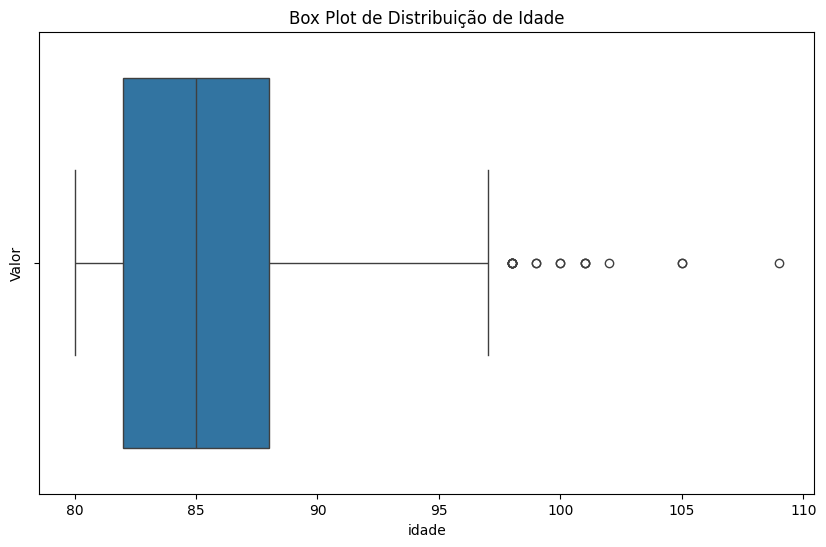

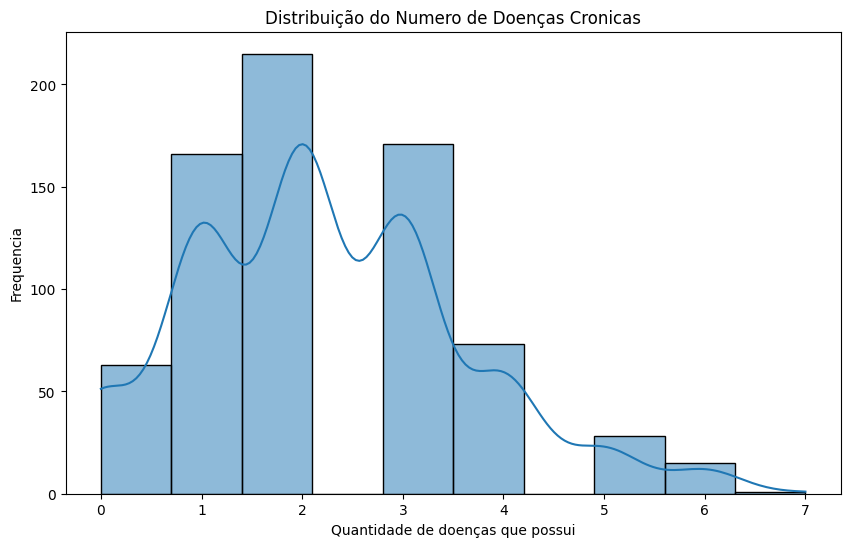

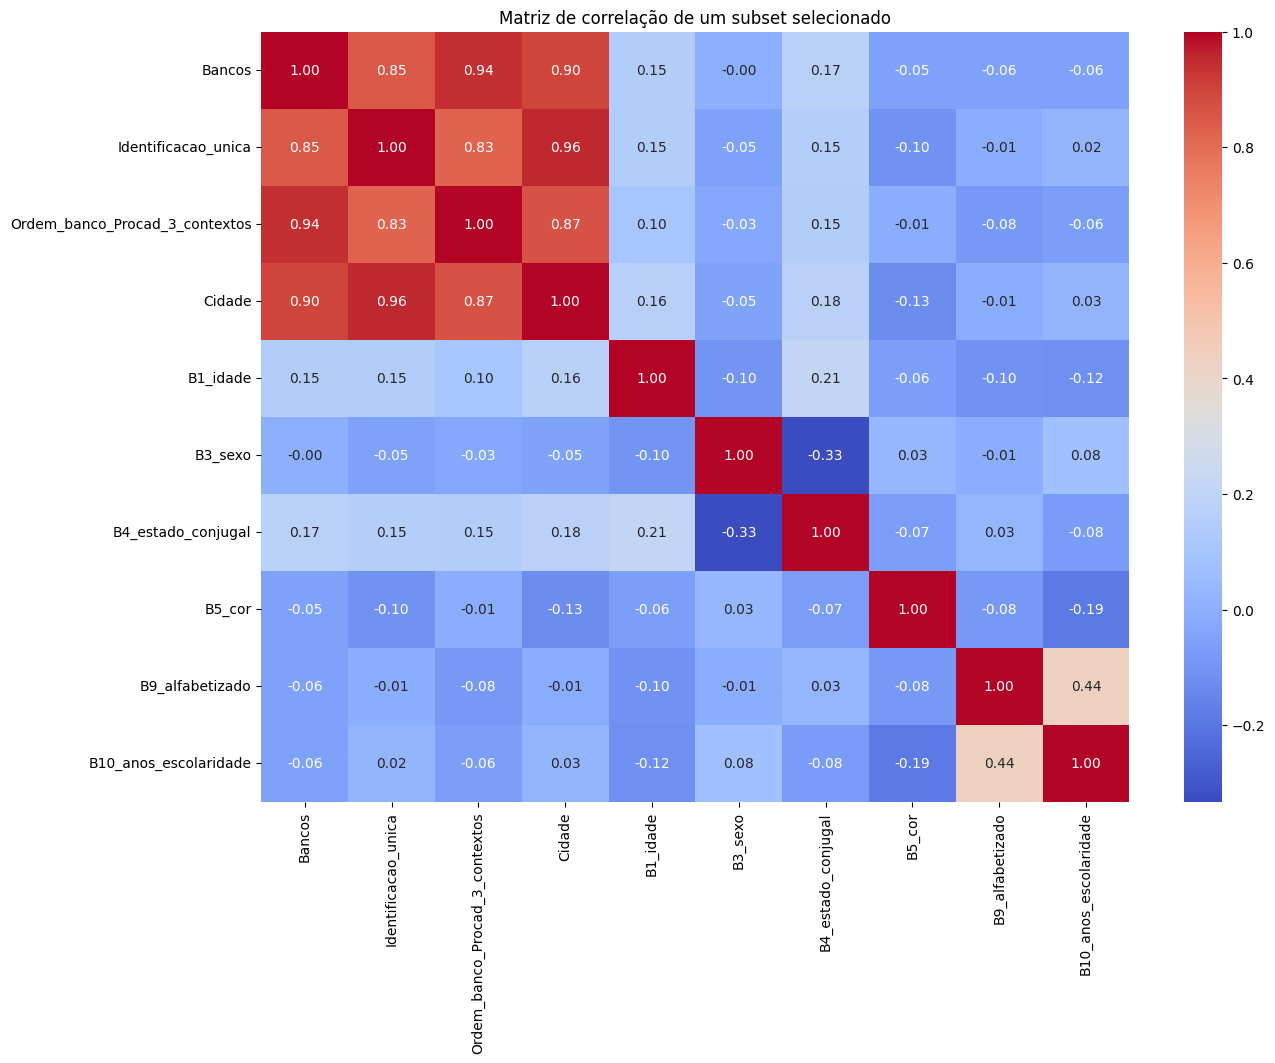

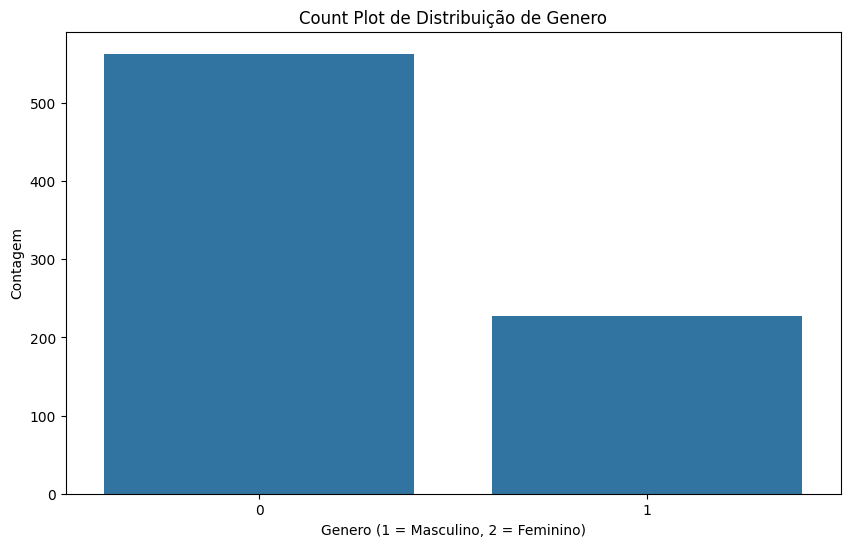

In [ ]:
# 1. Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['B1_idade'])
plt.title('Box Plot de Distribuição de Idade')
plt.xlabel('idade')
plt.ylabel('Valor')
plt.show()

# 2. Histograma:
plt.figure(figsize=(10, 6))
sns.histplot(df['G10_numero_doencas'], bins=10, kde=True)
plt.title('Distribuição do Numero de Doenças Cronicas')
plt.xlabel('Quantidade de doenças que possui')
plt.ylabel('Frequencia')
plt.show()

# 3. Heatmap: Matriz de correlação de um subset selecionado
plt.figure(figsize=(14, 10))
numerical_cols = df.select_dtypes(include='number').iloc[:, :10]  # Selecionando as 10 primeiras colunas numéricas
correlation_matrix = numerical_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlação de um subset selecionado')
plt.show()

# 4. Count Plot: Distribuição de Genero
plt.figure(figsize=(10, 6))
sns.countplot(x=df['B3_sexo'])
plt.title('Count Plot de Distribuição de Genero')
plt.xlabel('Genero (1 = Masculino, 2 = Feminino)')
plt.ylabel('Contagem')
plt.show()


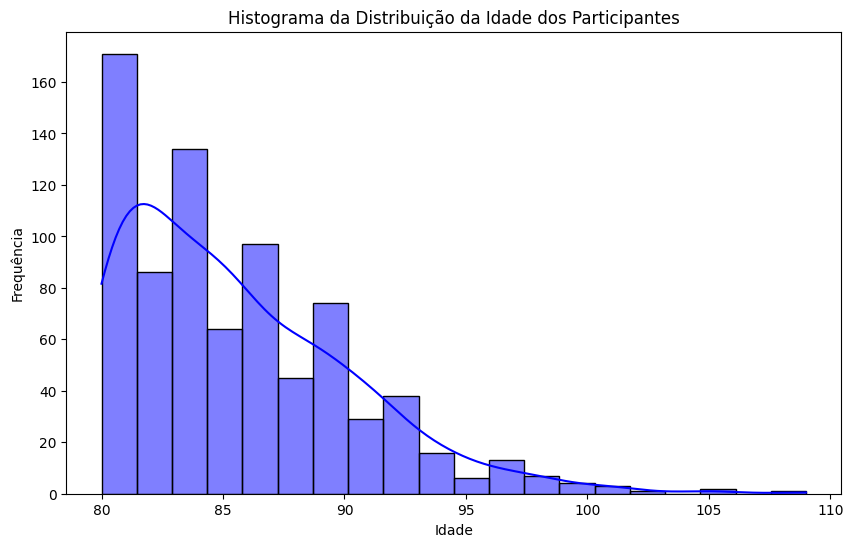

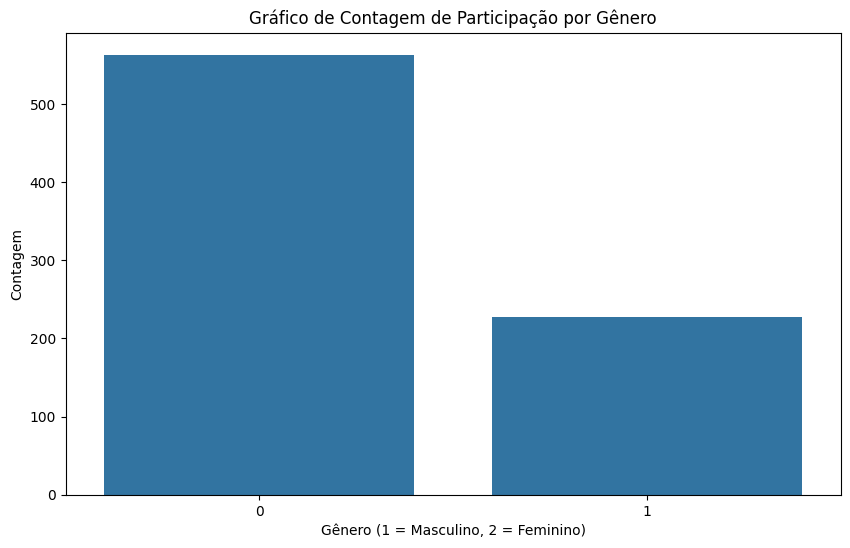

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. 'Histograma da Distribuição da Idade dos Participantes'
plt.figure(figsize=(10, 6))
sns.histplot(df['B1_idade'], bins=20, kde=True, color='blue')
plt.title('Histograma da Distribuição da Idade dos Participantes')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()


# 5. Count Plot of Physical Activity Participation )
plt.figure(figsize=(10, 6))
sns.countplot(x=df['B3_sexo'])
plt.title('Gráfico de Contagem de Participação por Gênero')
plt.xlabel('Gênero (1 = Masculino, 2 = Feminino)')
plt.ylabel('Contagem')
plt.show()


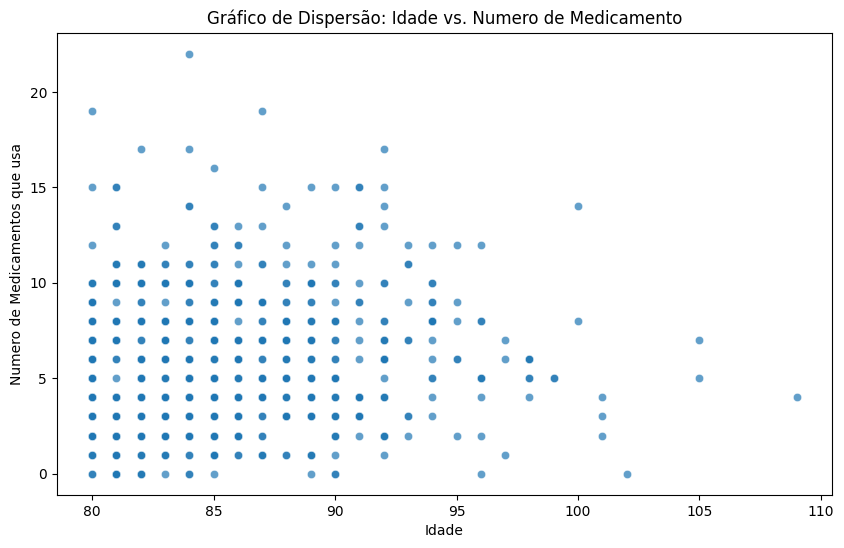

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['B1_idade'], y=df['G29_quantos_remedios'], alpha=0.7)
plt.title('Gráfico de Dispersão: Idade vs. Numero de Medicamento')
plt.xlabel('Idade')
plt.ylabel('Numero de Medicamentos que usa')
plt.show()

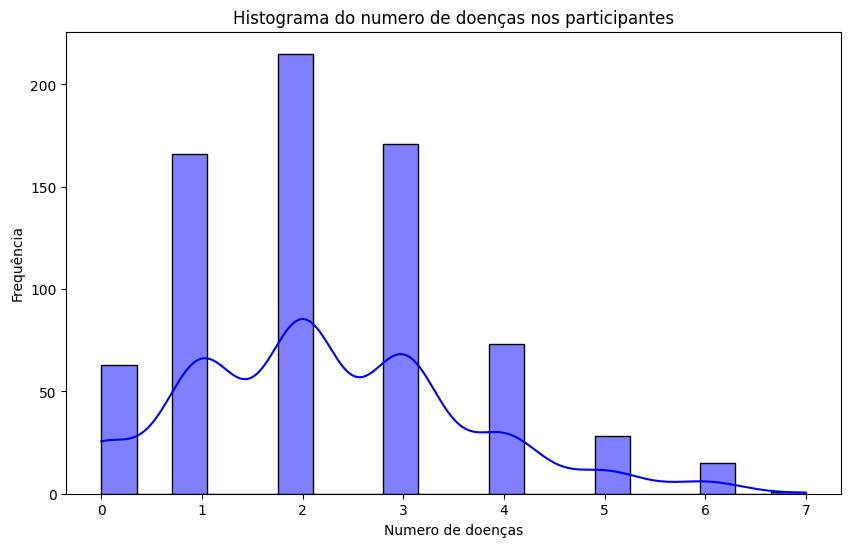

In [ ]:
#  Histograma do numero de doenças nos participante
plt.figure(figsize=(10, 6))
sns.histplot(df['G10_numero_doencas'], bins=20, kde=True, color='blue')
plt.title('Histograma do numero de doenças nos participantes')
plt.xlabel('Numero de doenças')
plt.ylabel('Frequência')
plt.show()

In [ ]:
df['D15_media_PAS_orto'] = df['D15_media_PAS_orto'].str.replace('.', '').fillna(0).astype(int)


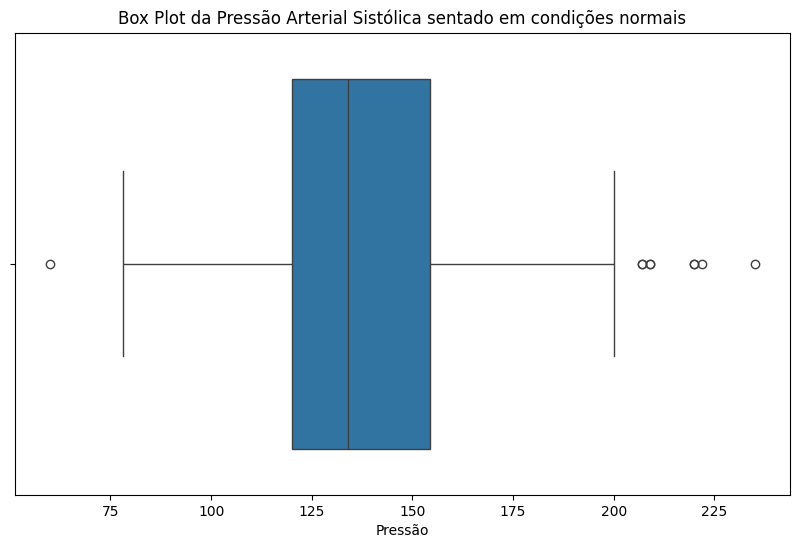

In [ ]:
# 2. Box Plot PAS
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['D1_PAS_sent1'])
plt.title('Box Plot da Pressão Arterial Sistólica sentado em condições normais')
plt.xlabel('Pressão')
plt.show()

In [ ]:
#  criar nova coluna 'pratica_atividade_fisica'

df['pratica_atividade_fisica'] = 0
for col in ['F8_ciclismo', 'F12_danca_salao', 'F20_ginastica_fora_casa', 'F24_hidroginastica',
            'F28_corrida_leve_caminh_vigorosa', 'F32_corrida_vigorosa', 'F36_musculacao',
            'F40_natacao_academia_campo_aberto', 'F44_voleibol']:
  df.loc[df[col] == 1, 'pratica_atividade_fisica'] = 1
df.loc[df[col].isnull(), 'pratica_atividade_fisica'] = np.random.choice([0, 1], size=df[col].isnull().sum(), p=[0.5, 0.5])



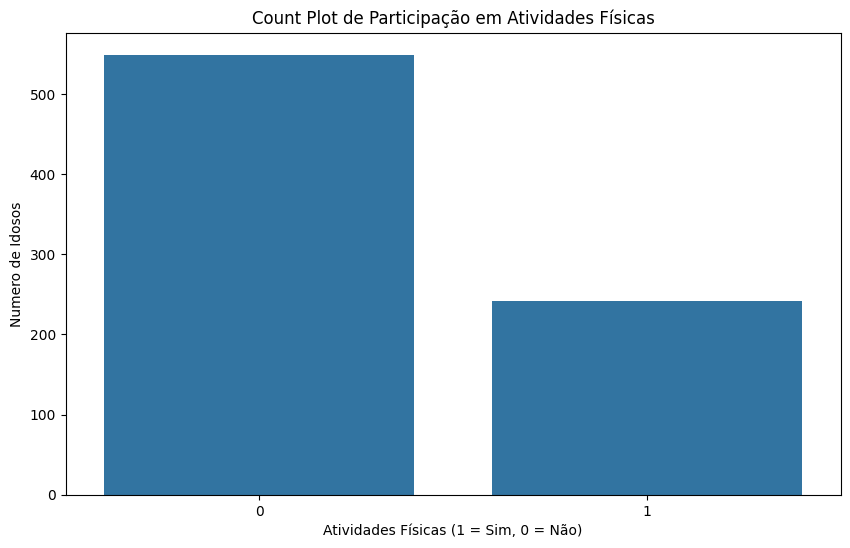

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=df['pratica_atividade_fisica'])
plt.title('Count Plot de Participação em Atividades Físicas')
plt.xlabel('Atividades Físicas (1 = Sim, 0 = Não)')
plt.ylabel('Numero de Idosos')
plt.show()


In [ ]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

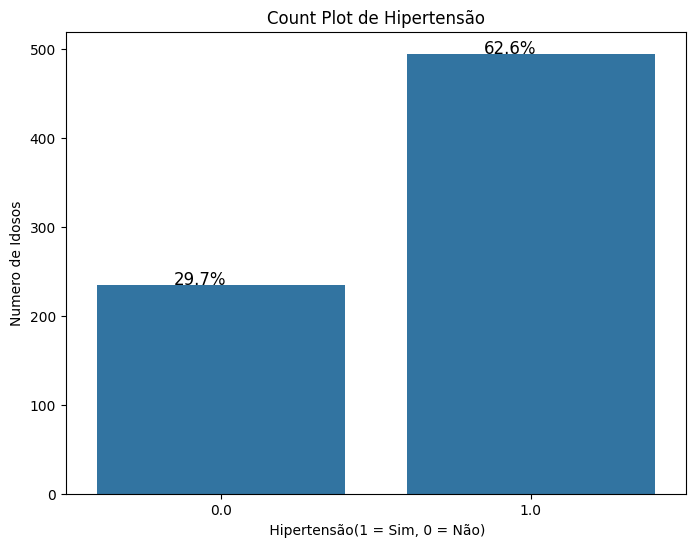

In [ ]:

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='G2_hipertensao', data=df)
plt.title('Count Plot de Hipertensão')
plt.xlabel(' Hipertensão(1 = Sim, 0 = Não)')
plt.ylabel('Numero de Idosos')

total = len(df['G2_hipertensao'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.15
    y = p.get_y() + p.get_height() + 0.2
    ax.annotate(percentage, (x, y), size=12)

plt.show()

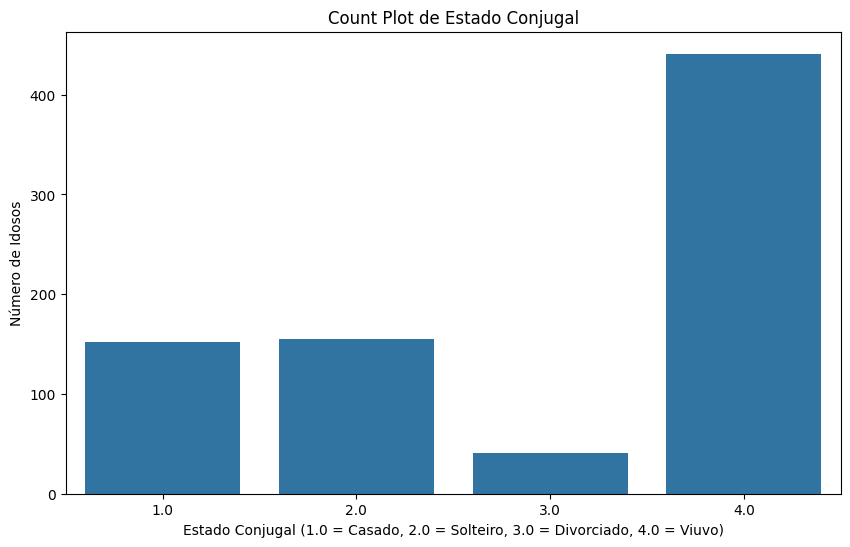

In [ ]:
# count plot B4_estado_conjugal. 1.0 = casado; 2.0=solteiro; 3.0=divorciado; 4,0 viuvo

plt.figure(figsize=(10, 6))
sns.countplot(x='B4_estado_conjugal', data=df)
plt.title('Count Plot de Estado Conjugal')
plt.xlabel('Estado Conjugal (1.0 = Casado, 2.0 = Solteiro, 3.0 = Divorciado, 4.0 = Viuvo)')
plt.ylabel('Número de Idosos')
plt.show()

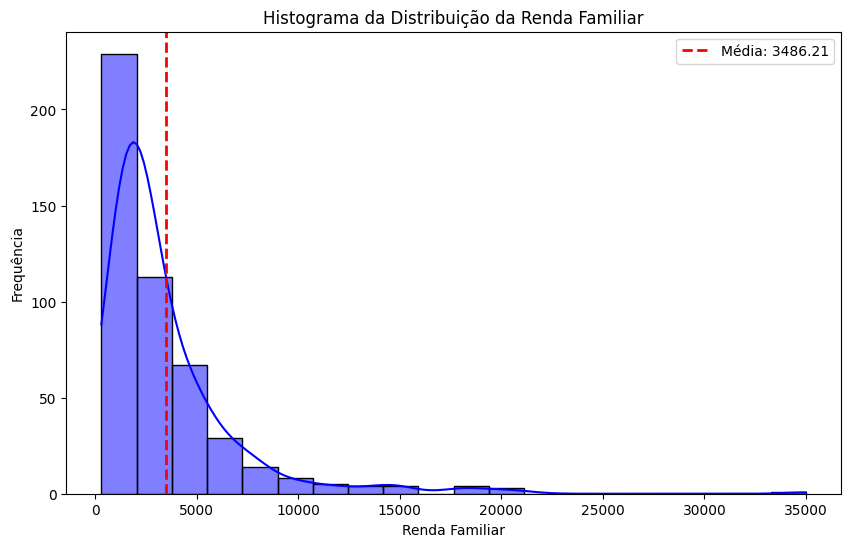

In [ ]:


#  histograma B26a_renda_familiar + media  + valor da media

plt.figure(figsize=(10, 6))
sns.histplot(df['B26a_renda_familiar'], bins=20, kde=True, color='blue')
plt.title('Histograma da Distribuição da Renda Familiar')
plt.xlabel('Renda Familiar')
plt.ylabel('Frequência')


media_renda = df['B26a_renda_familiar'].mean()

plt.axvline(media_renda, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_renda:.2f}')
#plt.axv(media_renda, color='red)
plt.legend()
plt.show()


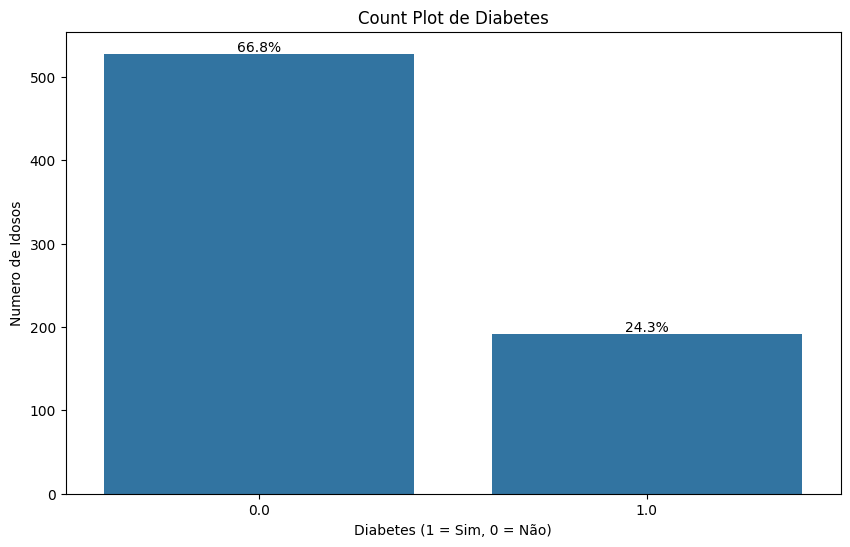

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='G4_diabetes', data=df)
plt.title('Count Plot de Diabetes')
plt.xlabel('Diabetes (1 = Sim, 0 = Não)')
plt.ylabel('Numero de Idosos')


total_count = len(df)
diabetes_counts = df['G4_diabetes'].value_counts()
diabetes_percentages = (diabetes_counts / total_count) * 100


for p in plt.gca().patches:
  height = p.get_height()
  plt.gca().text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:.1f}%'.format(height / total_count * 100),
                ha="center")


plt.show()


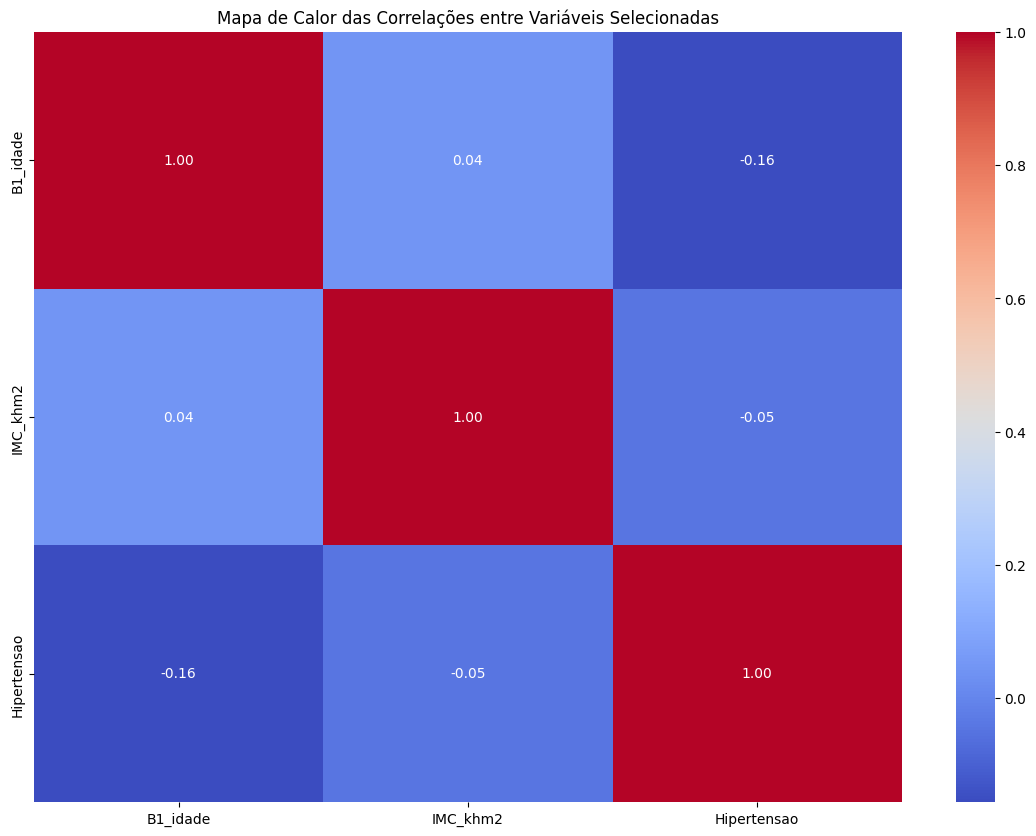

In [ ]:

df['B1_idade'] = pd.to_numeric(df['B1_idade'], errors='coerce').fillna(df['B1_idade'].mean())
df['IMC_khm2'] = pd.to_numeric(df['IMC_khm2'], errors='coerce')
df['IMC_khm2'] = df['IMC_khm2'].fillna(df['IMC_khm2'].mean())
df['IMC_khm2'] = pd.to_numeric(df['IMC_khm2'], errors='coerce').fillna(df['IMC_khm2'].mean())
df['Hipertensao'] = pd.to_numeric(df['Hipertensao'], errors='coerce').fillna(0)

#  Heatmap de Correlaçoes
plt.figure(figsize=(14, 10))
correlation_matrix = df[['B1_idade', 'IMC_khm2', 'Hipertensao']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor das Correlações entre Variáveis Selecionadas')
plt.show()



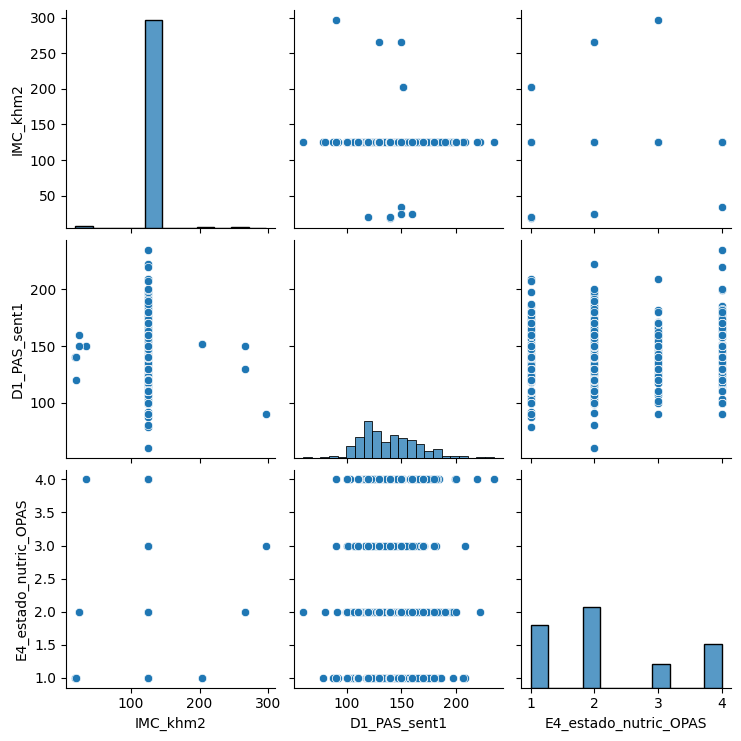

In [ ]:
sns.pairplot(df[['IMC_khm2', 'D1_PAS_sent1', 'E4_estado_nutric_OPAS']].dropna())
plt.show()

In [ ]:
# transformando de Dados Contínuos em Categóricos em imc e pressao arterial

def categorize_imc(imc):
  """Categoriza o IMC em faixas."""
  if imc < 18.5:
    return 'Abaixo do Peso'
  elif 18.5 <= imc < 24.9:
    return 'Normal'
  elif 25 <= imc < 29.9:
    return 'Sobrepeso Leve'
  elif 30 <= imc < 34.9:
    return 'Obesidade Grau I'
  elif 35 <= imc < 39.9:
    return 'Obesidade Grau II'
  else:
    return 'Obesidade Mórbida'

df['Faixa_IMC'] = df['IMC_khm2'].apply(categorize_imc)


In [ ]:
#   categorizar pressao sistolica e pressao diastolica em níveis de risco
def categorize_blood_pressure(systolic, diastolic):
    """Categoriza a pressão arterial em níveis de risco."""
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 or 80 <= diastolic < 90:
        return 'Pré-Hipertensão'
    else:
        return 'Hipertensão'


df['D15_media_PAS_orto'] = pd.to_numeric(df['D15_media_PAS_orto'], errors='coerce')
df['D16_media_PAD_orto'] = pd.to_numeric(df['D16_media_PAD_orto'], errors='coerce')
df['Nivel_Pressao'] = df.apply(lambda row: categorize_blood_pressure(row['D15_media_PAS_orto'], row['D16_media_PAD_orto']), axis=1)

print(df['Nivel_Pressao'].value_counts())



Nivel_Pressao
Hipertensão        701
Pré-Hipertensão     80
Normal              10
Name: count, dtype: int64


In [ ]:
import numpy as np

binary_cols = [col for col in df.columns if df[col].isin([0, 1, np.nan]).all()]
print(f"Colunas Binárias: {binary_cols}")

Colunas Binárias: ['B3_sexo', 'B9_alfabetizado', 'B12_sozinho', 'B13_conjuge', 'B14_filhos', 'B15_netos', 'B16_bisnetos', 'B17_outro_parente', 'B23_proprietario_resid', 'C1_dia', 'C2_mes', 'C3_ano', 'C4_dias_semana', 'C5_hora_dia', 'C6_localizacao1', 'C7_localizacao2', 'C8_bairro', 'C9_cidade', 'C10_estado', 'C11_carro', 'C12_vaso', 'C13_tijolo', 'C14_100menos7', 'C15_93menos7', 'C16_86menos7', 'C18_72menos7', 'C19_palavra1', 'C20_palavra2', 'C21_palavra3', 'C22_relogio', 'C23_caneta', 'C24_nem_aqui_ali_la', 'C25_pega_folha', 'C26_dobra', 'C27_chao', 'C28_olhos', 'C29_frase', 'C30_poligonos', 'C32_deficit_cognitivo_MEEM', 'F1_perda_peso', 'F3_fragilidade_perda_peso', 'F8_ciclismo', 'F12_danca_salao', 'F24_hidroginastica', 'F28_corrida_leve_caminh_vigorosa', 'F32_corrida_vigorosa', 'F33_dias_corrida_vigorosa', 'F34_minutos_corrida_vigorosa', 'F36_musculacao', 'F40_natacao_academia_campo_aberto', 'F41_dias_natacao_academia_campo_aberto', 'F42_minutos_natacao_academia_campo_aberto', 'F44_

In [ ]:
# knn imputation em dados faltantes

from sklearn.impute import KNNImputer

# Selecionar apenas as colunas numéricas para a imputação KNN
numerical_features = df.select_dtypes(include=np.number)

# Criar um objeto KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)

# Aplicar a imputação KNN às colunas numéricas
df_imputed = pd.DataFrame(knn_imputer.fit_transform(numerical_features), columns=numerical_features.columns)


# Substituir as colunas originais pelas colunas com valores imputados
df[numerical_features.columns] = df_imputed

# Verificar se ainda existem valores ausentes nas colunas numéricas
print(df[numerical_features.columns].isnull().sum())


Bancos                            0
Identificacao_unica               0
Ordem_banco_Procad_3_contextos    0
Cidade                            0
B1_idade                          0
                                 ..
escolaridade_cat                  0
cc_cat                            0
rcq_cat                           0
escola_cat                        0
pratica_atividade_fisica          0
Length: 306, dtype: int64


In [ ]:
target_columns = df[['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia',
                     'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo',
                     'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose',
                     'G10_numero_doencas']]
for col in target_columns:
  print(df[col].value_counts())


G1_coracao
0.0    581
1.0    158
0.2     28
0.4     18
0.6      4
0.8      2
Name: count, dtype: int64
G2_hipertensao
1.0    506
0.0    236
0.8     23
0.6     17
0.4      9
Name: count, dtype: int64
G3_AVC_isquemia
0.0    650
1.0     94
0.2     35
0.4     12
Name: count, dtype: int64
G4_diabetes
0.0    537
1.0    192
0.4     29
0.2     22
0.6      9
0.8      2
Name: count, dtype: int64
G5_cancer
0.0    688
1.0     63
0.2     24
0.4     15
0.6      1
Name: count, dtype: int64
G6_artrite_reumatismo
0.0    531
1.0    190
0.4     31
0.2     25
0.6     13
0.8      1
Name: count, dtype: int64
G7_doencas_pulmoes
0.0    684
1.0     69
0.2     30
0.4      5
0.6      3
Name: count, dtype: int64
G8_depressao
0.0    535
1.0    194
0.2     37
0.4     13
0.6      9
0.8      3
Name: count, dtype: int64
G9_osteoporose
0.0    533
1.0    184
0.2     32
0.4     26
0.6     15
0.8      1
Name: count, dtype: int64
G10_numero_doencas
2.0    219
3.0    178
1.0    166
4.0     74
0.0     63
5.0     28
6.0     1

In [ ]:


for col in binary_cols:
  df[col] = df[col].round(0).astype(int)
  print(df[col].value_counts())


B3_sexo
0    563
1    228
Name: count, dtype: int64
B9_alfabetizado
1    628
0    163
Name: count, dtype: int64
B12_sozinho
0    702
1     89
Name: count, dtype: int64
B13_conjuge
0    414
1    377
Name: count, dtype: int64
B14_filhos
1    514
0    277
Name: count, dtype: int64
B15_netos
0    643
1    148
Name: count, dtype: int64
B16_bisnetos
0    761
1     30
Name: count, dtype: int64
B17_outro_parente
0    713
1     78
Name: count, dtype: int64
B23_proprietario_resid
1    622
0    169
Name: count, dtype: int64
C1_dia
1    402
0    389
Name: count, dtype: int64
C2_mes
1    543
0    248
Name: count, dtype: int64
C3_ano
1    430
0    361
Name: count, dtype: int64
C4_dias_semana
1    531
0    260
Name: count, dtype: int64
C5_hora_dia
1    643
0    148
Name: count, dtype: int64
C6_localizacao1
1    635
0    156
Name: count, dtype: int64
C7_localizacao2
1    587
0    204
Name: count, dtype: int64
C8_bairro
1    542
0    249
Name: count, dtype: int64
C9_cidade
1    685
0    106
Name: count

In [ ]:
# Verificar colunas com dados ausentes
missing_values = df.isnull().sum()
print("Colunas com Dados Ausentes:")
print(missing_values[missing_values > 0])


Colunas com Dados Ausentes:
B2_data_nasc                         118
B26b_renda_fam_sm                    309
D13_media_PAS_sent                    75
D14_media_PAD_sent                    75
E3_IMC                                91
E8_relacao_cintura_quadril           326
F7_caminhada_3.8_METS                427
F15_danca_salao_4.5_METS             420
F19_ginastica_casa_3.5_METS          423
F23_ginastica_fora_casa_6.0_METS     421
F39_musculacao_3.0_METS              422
F48_soma_METS                        420
F57_media_forca_preensao             119
F64_media_tempo_marcha               220
J16_porcentagem_nunca_fez_AAVD       399
J17_porcentagem_deixou_fazer_AAVD    399
J18_porcentagem_ainda_faz_AAVD       399
dtype: int64


In [ ]:
import warnings
warnings.filterwarnings("ignore")
columns_to_adjust = [
    'J16_porcentagem_nunca_fez_AAVD',
    'J17_porcentagem_deixou_fazer_AAVD',
    'J18_porcentagem_ainda_faz_AAVD',
    'F64_media_tempo_marcha',
    'F57_media_forca_preensao',
    'E8_relacao_cintura_quadril',
    'IMC_khm2',
    'D13_media_PAS_sent',
    'D14_media_PAD_sent',
]

# Convert these columns to numeric and apply the same adjustment (dividing by 10^14) for large values
for column in columns_to_adjust:
    df[f'{column}_numeric'] = pd.to_numeric(df[column], errors='coerce')
    df[f'{column}_corrigido'] = df[f'{column}_numeric'] / 10**14

# Display a summary of the corrected columns
df[[f'{col}_corrigido' for col in columns_to_adjust]].describe()

,J16_porcentagem_nunca_fez_AAVD_corrigido,J17_porcentagem_deixou_fazer_AAVD_corrigido,J18_porcentagem_ainda_faz_AAVD_corrigido,F64_media_tempo_marcha_corrigido,F57_media_forca_preensao_corrigido,E8_relacao_cintura_quadril_corrigido,IMC_khm2_corrigido,D13_media_PAS_sent_corrigido,D14_media_PAD_sent_corrigido
count,7.500000e+01,8.900000e+01,6.400000e+01,1.980000e+02,2.220000e+02,5.200000e+01,7.910000e+02,2.780000e+02,2.460000e+02
mean,2.546667e-13,2.651685e-13,3.914063e-13,9.815732e-14,1.264140e-13,9.397644e-13,1.250477e-12,1.336799e-12,7.411992e-13
std,1.890898e-13,1.951696e-13,1.653651e-13,8.592976e-14,1.114356e-13,2.691424e-12,1.346539e-13,2.488929e-13,1.240765e-13
min,0.000000e+00,0.000000e+00,0.000000e+00,2.970000e-14,0.000000e+00,7.600000e-15,1.875000e-13,6.000000e-13,4.000000e-13
25%,2.500000e-13,2.500000e-13,2.500000e-13,5.000000e-14,1.100000e-14,9.475000e-15,1.250477e-12,1.200000e-12,6.700000e-13
50%,2.500000e-13,2.500000e-13,5.000000e-13,6.640000e-14,1.400000e-13,1.000000e-14,1.250477e-12,1.300000e-12,7.200000e-13
75%,2.500000e-13,5.000000e-13,5.000000e-13,1.000000e-13,2.000000e-13,1.100000e-14,1.250477e-12,1.487500e-12,8.000000e-13
max,7.500000e-13,7.500000e-13,7.500000e-13,6.223000e-13,5.100000e-13,9.840000e-12,2.968750e-12,2.210000e-12,1.470000e-12


In [ ]:
#preenchendo  B26b_renda_fam_sm  a partir de B26a_renda_familiar
# Cria uma nova coluna 'B26b_renda_fam_sm' preenchida com NaN
df['B26b_renda_fam_sm'] = np.nan

# Itera pelas linhas do DataFrame
for index, row in df.iterrows():
  if not pd.isna(row['B26a_renda_familiar']):
    if row['B26a_renda_familiar'] <= 1200:
      df.loc[index, 'B26b_renda_fam_sm'] = 1
    else:
      df.loc[index, 'B26b_renda_fam_sm'] = 1 + ((row['B26a_renda_familiar'] - 1200) // 1200)


In [ ]:
# Calcular o IMC para as linhas com valores faltantes em E3_IMC
df.loc[df['E3_IMC'].isnull(), 'E3_IMC'] = df.loc[df['E3_IMC'].isnull(), 'E1_peso'] / (df.loc[df['E3_IMC'].isnull(), 'E2_estatura'] / 100) ** 2


In [ ]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Columns: 306 entries, Bancos to pratica_atividade_fisica
dtypes: float64(306)
memory usage: 1.8 MB


In [ ]:
# transformar 'Faixa_IMC' em numerico

faixa_imc_map = {
    'Abaixo do Peso': 1,
    'Normal': 2,
    'Sobrepeso Leve': 3,
    'Obesidade Grau I': 4,
    'Obesidade Grau II': 5,
    'Obesidade Mórbida': 6
}

df['Faixa_IMC'] = df['Faixa_IMC'].map(faixa_imc_map)
print(df['Faixa_IMC'].head())


0    6
1    6
2    6
3    6
4    6
Name: Faixa_IMC, dtype: int64


In [ ]:

# Cria um dicionário para mapear os níveis de pressão para valores numéricos
nivel_pressao_map = {
    'Normal': 1,
    'Pré-Hipertensão': 2,
    'Hipertensão': 3
}


df['Nivel_Pressao'] = df['Nivel_Pressao'].map(nivel_pressao_map)
print(df['Nivel_Pressao'].head())


0    2
1    3
2    3
3    3
4    3
Name: Nivel_Pressao, dtype: int64


In [ ]:
drop_cols = ['F7_caminhada_3.8_METS',
'F15_danca_salao_4.5_METS',
'F19_ginastica_casa_3.5_METS',
'F23_ginastica_fora_casa_6.0_METS',
'F39_musculacao_3.0_METS',
'F48_soma_METS',
'J16_porcentagem_nunca_fez_AAVD',
'J17_porcentagem_deixou_fazer_AAVD',
'J18_porcentagem_ainda_faz_AAVD',
'E8_relacao_cintura_quadril']

df.drop(columns=drop_cols, inplace=True)


In [ ]:

columns_to_adjust = [
    'F64_media_tempo_marcha',
    'F57_media_forca_preensao',
    'IMC_khm2',
    'D13_media_PAS_sent',
    'D14_media_PAD_sent',
]

print(df[columns_to_adjust].head(20))

for column in columns_to_adjust:
    df[f'{column}'] = pd.to_numeric(df[column], errors='coerce')
    df[f'{column}'] = df[f'{column}'] / 10**14 # Use the original column name

df[[f'{col}' for col in columns_to_adjust]].describe()

   F64_media_tempo_marcha F57_media_forca_preensao    IMC_khm2  \
0                    6.27      273.333.333.333.333  125.047727   
1     121.333.333.333.333                       12  125.047727   
2     102.333.333.333.333      213.333.333.333.333  203.125000   
3     488.333.333.333.333      106.666.666.666.667  125.047727   
4     132.933.333.333.333      273.333.333.333.333  125.047727   
5                    7.71      233.333.333.333.333  125.047727   
6     129.933.333.333.333                       14  125.047727   
7                    6.87      183.333.333.333.333  125.047727   
8     496.666.666.666.667      326.666.666.666.667  125.047727   
9                    6.16      193.333.333.333.333  125.047727   
10                    4.6      256.666.666.666.667  125.047727   
11                  10.43      188.333.333.333.333  125.047727   
12    403.666.666.666.667                       15  125.047727   
13    535.333.333.333.333      326.666.666.666.667  125.047727   
14        

,F64_media_tempo_marcha,F57_media_forca_preensao,IMC_khm2,D13_media_PAS_sent,D14_media_PAD_sent
count,1.980000e+02,2.220000e+02,7.910000e+02,2.780000e+02,2.460000e+02
mean,9.815732e-14,1.264140e-13,1.250477e-12,1.336799e-12,7.411992e-13
std,8.592976e-14,1.114356e-13,1.346539e-13,2.488929e-13,1.240765e-13
min,2.970000e-14,0.000000e+00,1.875000e-13,6.000000e-13,4.000000e-13
25%,5.000000e-14,1.100000e-14,1.250477e-12,1.200000e-12,6.700000e-13
50%,6.640000e-14,1.400000e-13,1.250477e-12,1.300000e-12,7.200000e-13
75%,1.000000e-13,2.000000e-13,1.250477e-12,1.487500e-12,8.000000e-13
max,6.223000e-13,5.100000e-13,2.968750e-12,2.210000e-12,1.470000e-12


In [ ]:

df['F57_media_forca_preensao'] = pd.to_numeric(df['F57_media_forca_preensao'], errors='coerce')
df['F64_media_tempo_marcha'] = pd.to_numeric(df['F64_media_tempo_marcha'], errors='coerce')
df['F57_media_forca_preensao'].fillna(df['F57_media_forca_preensao'].mean(), inplace=True)
df['F64_media_tempo_marcha'].fillna(df['F64_media_tempo_marcha'].mean(), inplace=True)

# Modelos de predição



##Regressão Logistica


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

for coluna_alvo in ['G1_coracao','G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                   'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                   'G8_depressao', 'G9_osteoporose']:
    print(f"\nRegressão Logística para {coluna_alvo}:")

    X = df.drop(columns=[coluna_alvo,
                        'F57_media_forca_preensao',
                        'F64_media_tempo_marcha',
                        'D13_media_PAS_sent',
                        'D14_media_PAD_sent',
                        'B2_data_nasc', 'E3_IMC'])
    y = df[coluna_alvo]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811, stratify=y)

    imputer = SimpleImputer(strategy='mean')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    model_LogR = LogisticRegression(max_iter=1000)
    model_LogR.fit(X_train, y_train)

    y_pred = model_LogR.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print(f'Acurácia: {accuracy}')

    print(classification_report(y_test, y_pred, zero_division=1))
    print(confusion_matrix(y_test, y_pred))




Regressão Logística para G1_coracao:
Acurácia: 0.7941176470588235
              precision    recall  f1-score   support

           0       0.79      1.00      0.89       189
           1       1.00      0.00      0.00        49

    accuracy                           0.79       238
   macro avg       0.90      0.50      0.44       238
weighted avg       0.84      0.79      0.70       238

[[189   0]
 [ 49   0]]

Regressão Logística para G2_hipertensao:
Acurácia: 0.6890756302521008
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        74
           1       0.69      1.00      0.82       164

    accuracy                           0.69       238
   macro avg       0.84      0.50      0.41       238
weighted avg       0.79      0.69      0.56       238

[[  0  74]
 [  0 164]]

Regressão Logística para G3_AVC_isquemia:
Acurácia: 0.8823529411764706
              precision    recall  f1-score   support

           0       0.88      1.00  

##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


target_column = 'G1_coracao'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')

# Impute valores faltantes para evitar erros
features = features.fillna(features.mean())

# Dividindo oes dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, df[target_column], test_size=0.3, random_state=42)

# Treinamento do modelo
model_RFC_coracao = RandomForestClassifier(random_state=42)
model_RFC_coracao.fit(X_train, y_train)


model_RFC_coracao = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC_coracao.fit(X_train, y_train)

# Previsões
y_pred = model_RFC_coracao.predict(X_test)

# Avaliação
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.7899159663865546
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88       193
           1       0.14      0.02      0.04        45

    accuracy                           0.79       238
   macro avg       0.48      0.50      0.46       238
weighted avg       0.68      0.79      0.72       238

Matriz de Confusão:
[[187   6]
 [ 44   1]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

target_column = 'G2_hipertensao'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')


features = features.fillna(features.mean())


X_train, X_test, y_train, y_test = train_test_split(features, df[target_column], test_size=0.3, random_state=42)

model_RFC_hipertensao = RandomForestClassifier(random_state=42)
model_RFC_hipertensao.fit(X_train, y_train)


model_RFC_hipertensao = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC_hipertensao.fit(X_train, y_train)

y_pred = model_RFC_hipertensao.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))



Acurácia: 0.8277310924369747
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.59      0.70        80
           1       0.82      0.95      0.88       158

    accuracy                           0.83       238
   macro avg       0.84      0.77      0.79       238
weighted avg       0.83      0.83      0.82       238

Matriz de Confusão:
[[ 47  33]
 [  8 150]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



target_column = 'G3_AVC_isquemia'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')


features = features.fillna(features.mean())


X_train, X_test, y_train, y_test = train_test_split(features, df[target_column], test_size=0.3, random_state=42)


model_RFC_AVC_isquemia = RandomForestClassifier(random_state=42)
model_RFC_AVC_isquemia.fit(X_train, y_train)


model_RFC_AVC_isquemia = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC_AVC_isquemia.fit(X_train, y_train)


y_pred = model_RFC_AVC_isquemia.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))




Acurácia: 0.8613445378151261
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       205
           1       0.50      0.03      0.06        33

    accuracy                           0.86       238
   macro avg       0.68      0.51      0.49       238
weighted avg       0.81      0.86      0.80       238

Matriz de Confusão:
[[204   1]
 [ 32   1]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



target_column = 'G4_diabetes'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')

features = features.fillna(features.mean())



X_train, X_test, y_train, y_test = train_test_split(features, df[target_column], test_size=0.3, random_state=42)


model_RFC_diabetes = RandomForestClassifier(random_state=42)
model_RFC_diabetes.fit(X_train, y_train)

model_RFC_diabetes = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC_diabetes.fit(X_train, y_train)

y_pred = model_RFC_diabetes.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))




Acurácia: 0.7436974789915967
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       173
           1       0.83      0.08      0.14        65

    accuracy                           0.74       238
   macro avg       0.79      0.54      0.50       238
weighted avg       0.77      0.74      0.66       238

Matriz de Confusão:
[[172   1]
 [ 60   5]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



target_column = 'G5_cancer'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')


features = features.fillna(features.mean())

X_train, X_test, y_train, y_test = train_test_split(features,df[target_column], test_size=0.3, random_state=42)


model_RFC_cancer = RandomForestClassifier(random_state=42)
model_RFC_cancer.fit(X_train, y_train)

model_RFC_cancer = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC_cancer.fit(X_train, y_train)

y_pred = model_RFC_cancer.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))




Acurácia: 0.9243697478991597
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       220
           1       0.00      0.00      0.00        18

    accuracy                           0.92       238
   macro avg       0.46      0.50      0.48       238
weighted avg       0.85      0.92      0.89       238

Matriz de Confusão:
[[220   0]
 [ 18   0]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



target_column = 'G6_artrite_reumatismo'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')

features = features.fillna(features.mean())


X_train, X_test, y_train, y_test = train_test_split(features,df[target_column], test_size=0.3, random_state=42)

model_RFC_artrite = RandomForestClassifier(random_state=42)
model_RFC_artrite.fit(X_train, y_train)

model_RFC_artrite = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC_artrite.fit(X_train, y_train)

y_pred = model_RFC_artrite.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.7352941176470589
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.74      0.99      0.85       174
           1       0.67      0.03      0.06        64

    accuracy                           0.74       238
   macro avg       0.70      0.51      0.45       238
weighted avg       0.72      0.74      0.63       238

Matriz de Confusão:
[[173   1]
 [ 62   2]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



target_column = 'G7_doencas_pulmoes'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')


features = features.fillna(features.mean())

X_train, X_test, y_train, y_test = train_test_split(features,df[target_column], test_size=0.3, random_state=42)

model_RFC_pulmoes = RandomForestClassifier(random_state=42)
model_RFC_pulmoes.fit(X_train, y_train)


model_RFC_pulmoes = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC_pulmoes.fit(X_train, y_train)

y_pred = model_RFC_pulmoes.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.8949579831932774
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       213
           1       0.00      0.00      0.00        25

    accuracy                           0.89       238
   macro avg       0.45      0.50      0.47       238
weighted avg       0.80      0.89      0.85       238

Matriz de Confusão:
[[213   0]
 [ 25   0]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


target_column = 'G8_depressao'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')


features = features.fillna(features.mean())


X_train, X_test, y_train, y_test = train_test_split(features,df[target_column], test_size=0.3, random_state=42)

model_RFC_depressao = RandomForestClassifier(random_state=42)
model_RFC_depressao.fit(X_train, y_train)


model_RFC_depressao = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC_depressao.fit(X_train, y_train)


y_pred = model_RFC_depressao.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.7394957983193278
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84       168
           1       0.83      0.14      0.24        70

    accuracy                           0.74       238
   macro avg       0.78      0.57      0.54       238
weighted avg       0.76      0.74      0.67       238

Matriz de Confusão:
[[166   2]
 [ 60  10]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


target_column = 'G9_osteoporose'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')


features = features.fillna(features.mean())


X_train, X_test, y_train, y_test = train_test_split(features,df[target_column], test_size=0.3, random_state=42)

model_RFC_osteoporose = RandomForestClassifier(random_state=42)
model_RFC_osteoporose.fit(X_train, y_train)


model_RFC_osteoporose = RandomForestClassifier(n_estimators=100, random_state=42)
model_RFC_osteoporose.fit(X_train, y_train)

y_pred = model_RFC_osteoporose.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")

print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.7647058823529411
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.97      0.86       184
           1       0.40      0.07      0.12        54

    accuracy                           0.76       238
   macro avg       0.59      0.52      0.49       238
weighted avg       0.69      0.76      0.70       238

Matriz de Confusão:
[[178   6]
 [ 50   4]]


##Suport Vector Machine Classifier

Accuracy: 0.7605042016806722
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       193
           1       0.38      0.40      0.39        45

    accuracy                           0.76       238
   macro avg       0.62      0.62      0.62       238
weighted avg       0.77      0.76      0.76       238

Confusion Matrix:
[[163  30]
 [ 27  18]]
AUC-ROC: 0.622279792746114


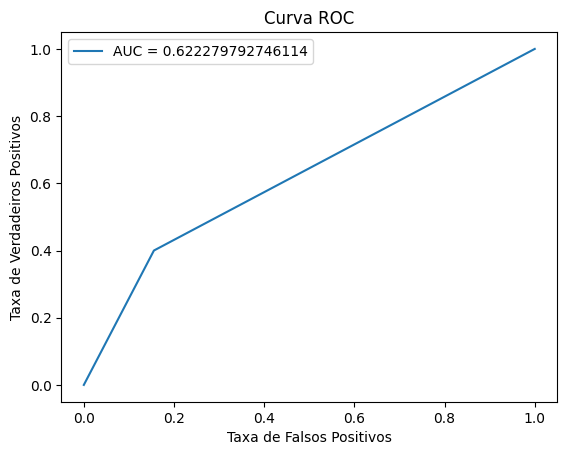

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve


target_column = 'G1_coracao'
features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')

features = features.fillna(features.mean())

#dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(features, df[target_column], test_size=0.3, random_state=42)

# Scalnado as variavesi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Trainando o modelo svc

model_SVC_coracao = SVC(kernel='linear', C=1)
model_SVC_coracao.fit(X_train, y_train)

# Fazendo as predições
y_pred = model_SVC_coracao.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc_roc}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc_roc}')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend()
plt.show()



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

target_columnas = [ 'G2_hipertensao', 'G3_AVC_isquemia',
                     'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo',
                     'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose']
features = df.select_dtypes(include=['number']).drop(columns=target_columnas, errors='ignore')


features = features.fillna(features.mean())


X_train, X_test, y_train, y_test = train_test_split(features, df[target_columnas], test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando e  trainando  modelos para cada coluna alvo
models = {}
for target_column in target_columnas:
    model = SVC(kernel='linear', C=1)
    model.fit(X_train, y_train[target_column])  # Traine separado a cada coluna alvo
    models[target_column] = model  # Guardando o resultado

# Fazendo as predições
for target_column, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test[target_column], y_pred)
    print(f"Resultados para {target_column}:")
    print(f"Accuracia: {accuracy}")
    print("Relatória de classificação:")
    print(classification_report(y_test[target_column], y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test[target_column], y_pred))
    print("-" * 50)

Resultados para G2_hipertensao:
Accuracia: 0.7605042016806722
Relatória de classificação:
              precision    recall  f1-score   support

           0       0.65      0.61      0.63        80
           1       0.81      0.84      0.82       158

    accuracy                           0.76       238
   macro avg       0.73      0.72      0.73       238
weighted avg       0.76      0.76      0.76       238

Confusion Matrix:
[[ 49  31]
 [ 26 132]]
--------------------------------------------------
Resultados para G3_AVC_isquemia:
Accuracia: 0.8277310924369747
Relatória de classificação:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       205
           1       0.36      0.30      0.33        33

    accuracy                           0.83       238
   macro avg       0.62      0.61      0.61       238
weighted avg       0.82      0.83      0.82       238

Confusion Matrix:
[[187  18]
 [ 23  10]]
--------------------------------

AUC-ROC para G2_hipertensao: 0.7239715189873418


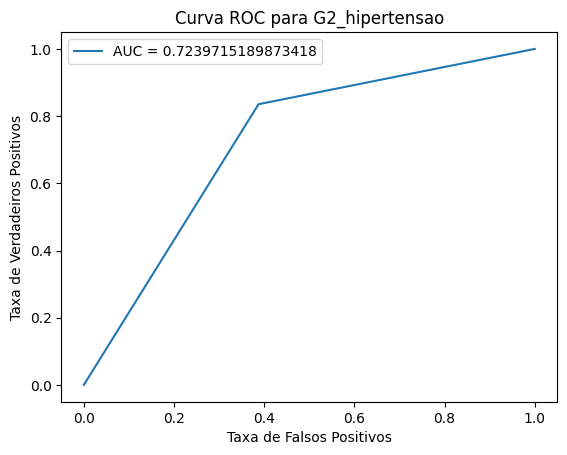

AUC-ROC para G3_AVC_isquemia: 0.6076127124907613


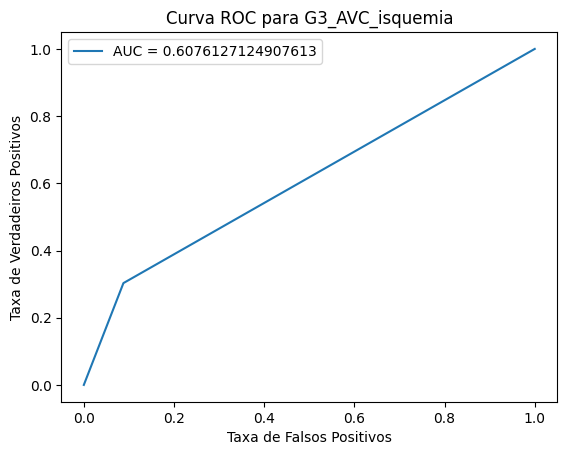

AUC-ROC para G4_diabetes: 0.6497999110715873


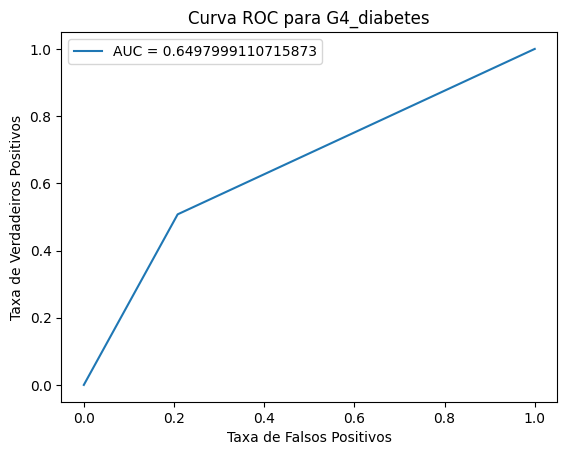

AUC-ROC para G5_cancer: 0.47550505050505054


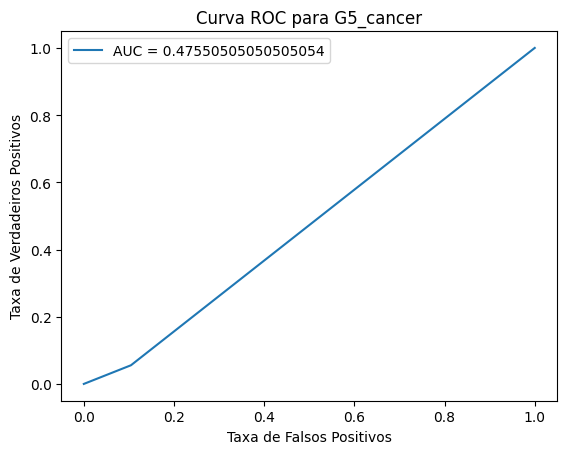

AUC-ROC para G6_artrite_reumatismo: 0.6716056034482759


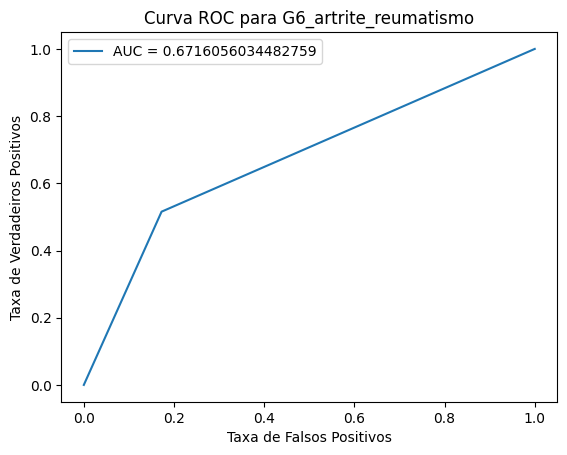

AUC-ROC para G7_doencas_pulmoes: 0.5671361502347417


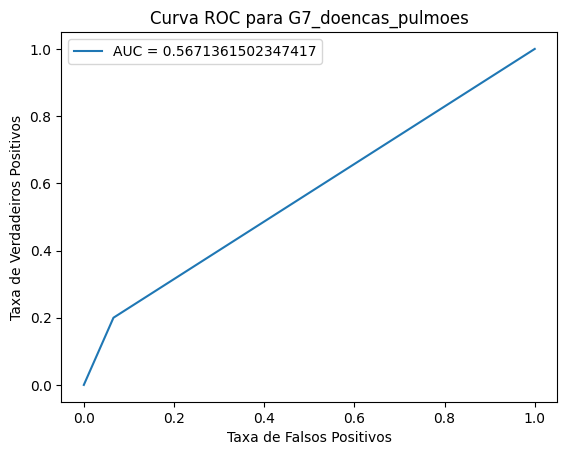

AUC-ROC para G8_depressao: 0.6577380952380951


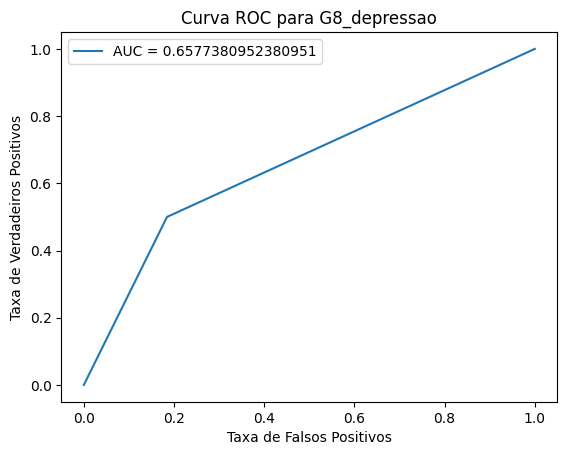

AUC-ROC para G9_osteoporose: 0.6658615136876006


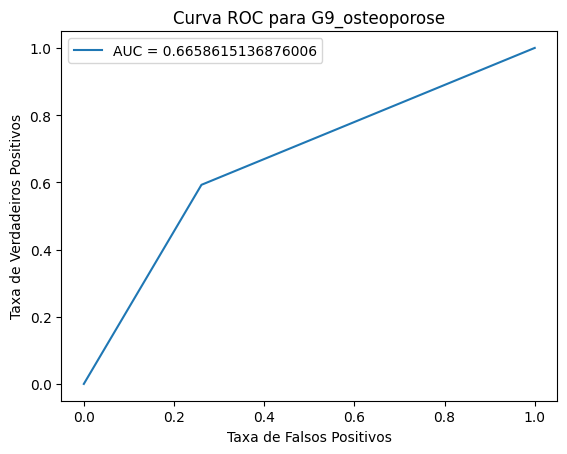

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

target_columnas = [ 'G2_hipertensao', 'G3_AVC_isquemia',
                     'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo',
                     'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose']
features = df.select_dtypes(include=['number']).drop(columns=target_columnas, errors='ignore')


features = features.fillna(features.mean())

X_train, X_test, y_train, y_test = train_test_split(features, df[target_columnas], test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models = {}
for target_column in target_columnas:
    model = SVC(kernel='linear', C=1)
    model.fit(X_train, y_train[target_column])
    models[target_column] = model

# Calcular a AUC-ROC para cada coluna alvo
for target_column, model in models.items():
    y_pred = model.predict(X_test)
    try:
        auc_roc = roc_auc_score(y_test[target_column], y_pred)
        print(f"AUC-ROC para {target_column}: {auc_roc}")

        # Plotar a curva ROC
        fpr, tpr, thresholds = roc_curve(y_test[target_column], y_pred)
        plt.plot(fpr, tpr, label=f'AUC = {auc_roc}')
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title(f'Curva ROC para {target_column}')
        plt.legend()
        plt.show()
    except ValueError:
        print(f"Não foi possível calcular a AUC-ROC para {target_column} (possivelmente apenas uma classe presente nos dados de teste).")

## Convolutional neural networks

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


target_columns = ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia',
                 'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo',
                 'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose']


features = df.select_dtypes(include=['number']).drop(columns=target_columns, errors='ignore')
features = features.fillna(features.mean())

X_train, X_test, y_train, y_test = train_test_split(features, df[target_columns], test_size=0.3, random_state=42)

# Scalando as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ajustando os dados para um modelo cnn
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Definindo o modelo cnn
model_CNN = models.Sequential()
model_CNN.add(layers.Conv1D(32, (3), activation='relu', input_shape=(X_train.shape[1], 1)))
model_CNN.add(layers.MaxPooling1D((2)))
model_CNN.add(layers.Conv1D(64, (3), activation='relu'))
model_CNN.add(layers.MaxPooling1D((2)))
model_CNN.add(layers.Flatten())
model_CNN.add(layers.Dense(64, activation='relu'))
# Modificando a camada de saída para ter 9 neurons com ativação sigmóide
model_CNN.add(layers.Dense(len(target_columns), activation='sigmoid'))

# Compile the model_CNN
model_CNN.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary_crossentropy for multi-label classification
              metrics=['accuracy'])

# Trainando o modelo_CNN
model_CNN.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


loss, accuracy = model_CNN.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

# Predições
y_pred = (model_CNN.predict(X_test) > 0.5).astype("int32")

## Loop para cada coluna alvo
for target_col in target_columns:
    y_test_col = y_test[target_col]
    # prediçoes para cada coluna
    y_pred_col = y_pred[:, target_columns.index(target_col)]

   # Avaliação
    cm = confusion_matrix(y_test_col, y_pred_col)
    print(f"Confusion Matrix for {target_col}:")
    print(cm)


    class_report = classification_report(y_test_col, y_pred_col)
    print(f"Classification Report for {target_col}:")
    print(class_report)

    auc_roc = roc_auc_score(y_test_col, y_pred_col)
    print(f"AUC-ROC for {target_col}: {auc_roc}")

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.3626 - loss: 0.5504 - val_accuracy: 0.5126 - val_loss: 0.4923
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.5294 - loss: 0.4516 - val_accuracy: 0.5126 - val_loss: 0.4813
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5775 - loss: 0.4297 - val_accuracy: 0.5126 - val_loss: 0.4888
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5162 - loss: 0.4101 - val_accuracy: 0.4832 - val_loss: 0.4709
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5675 - loss: 0.3619 - val_accuracy: 0.4958 - val_loss: 0.4657
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5536 - loss: 0.3362 - val_accuracy: 0.4958 - val_loss: 0.4766
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5345 - loss: 0.2983 - val_accuracy: 0.4538 - val_loss: 0.4849
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5347 - loss: 0.2824 - val_accuracy: 0.4034 - v

## Modelos de Boosting

###XG Boost

In [ ]:
from xgboost import XGBClassifier

target_columns = ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia',
                 'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo',
                 'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose']

features = df.select_dtypes(include=['number']).drop(columns=target_columns, errors='ignore')
features = features.fillna(features.mean())

X_train, X_test, y_train, y_test = train_test_split(features, df[target_columns], test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando e trainando  modelos separados para cada coluna usando XGBoost
models_xgb = {}
for target_column in target_columns:
    model = XGBClassifier(random_state=42)
    model.fit(X_train, y_train[target_column])  # Treinando cada coluna
    models_xgb[target_column] = model
# Fazndo prediçoes para cada coluna
for target_column, model in models_xgb.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test[target_column], y_pred)
    auc_roc = roc_auc_score(y_test[target_column], y_pred)
    print(f"Resultados para {target_column} (XGBoost):")
    print(f"Accuracia: {accuracy}")
    print("Relatória de classificação:")
    print(classification_report(y_test[target_column], y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test[target_column], y_pred))
    print(f"AUC-ROC para {target_column} (XGBoost): {auc_roc}")
    print("-" * 50)

Resultados para G1_coracao (XGBoost):
Accuracia: 0.8025210084033614
Relatória de classificação:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       193
           1       0.47      0.42      0.45        45

    accuracy                           0.80       238
   macro avg       0.67      0.66      0.66       238
weighted avg       0.79      0.80      0.80       238

Confusion Matrix:
[[172  21]
 [ 26  19]]
AUC-ROC para G1_coracao (XGBoost): 0.656706966033391
--------------------------------------------------
Resultados para G2_hipertensao (XGBoost):
Accuracia: 0.8781512605042017
Relatória de classificação:
              precision    recall  f1-score   support

           0       0.85      0.78      0.81        80
           1       0.89      0.93      0.91       158

    accuracy                           0.88       238
   macro avg       0.87      0.85      0.86       238
weighted avg       0.88      0.88      0.88       238

Confu

###LightGBM

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

target_columns = ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia',
                 'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo',
                 'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose']

features = df.select_dtypes(include=['number']).drop(columns=target_columns, errors='ignore')
features = features.fillna(features.mean())

X_train, X_test, y_train, y_test = train_test_split(features, df[target_columns], test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando e treinando separado usando LightGBM
models_lgb = {}
for target_column in target_columns:
    model = lgb.LGBMClassifier(random_state=42)
    model.fit(X_train, y_train[target_column])
    models_lgb[target_column] = model

# prediçoes
for target_column, model in models_lgb.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test[target_column], y_pred)
    auc_roc = roc_auc_score(y_test[target_column], y_pred)
    print(f"Resultados para {target_column} (LightGBM):")
    print(f"Accuracia: {accuracy}")
    print("Relatória de classificação:")
    print(classification_report(y_test[target_column], y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test[target_column], y_pred))
    print(f"AUC-ROC para {target_column} (LightGBM): {auc_roc}")
    print("-" * 50)

[LightGBM] [Info] Number of positive: 119, number of negative: 434
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5243
[LightGBM] [Info] Number of data points in the train set: 553, number of used features: 292
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.215190 -> initscore=-1.293921
[LightGBM] [Info] Start training from score -1.293921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

###CatBoost

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier  # Importando  CatBoostClassifier

target_columns = ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia',
                 'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo',
                 'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose']

features = df.select_dtypes(include=['number']).drop(columns=target_columns, errors='ignore')
features = features.fillna(features.mean())

X_train, X_test, y_train, y_test = train_test_split(features, df[target_columns], test_size=0.3, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


models_cat = {}
for target_column in target_columns:
  model = CatBoostClassifier(iterations=100, random_seed=42, verbose=0)
  model.fit(X_train, y_train[target_column])
  models_cat[target_column] = model


for target_column, model in models_cat.items():
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test[target_column], y_pred)
  auc_roc = roc_auc_score(y_test[target_column], y_pred)
  print(f"Resultados para {target_column} (CatBoost):")
  print(f"Accuracia: {accuracy}")
  print("Relatória de classificação:")
  print(classification_report(y_test[target_column], y_pred))
  print("Confusion Matrix:")
  print(confusion_matrix(y_test[target_column], y_pred))
  print(f"AUC-ROC para {target_column} (CatBoost): {auc_roc}")
  print("-" * 50)  #

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.2 MB/s eta 0:00:00
Resultados para G1_coracao (CatBoost):
Accuracia: 0.8487394957983193
Relatória de classificação:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       193
           1       0.68      0.38      0.49        45

    accuracy                           0.85       238
   macro avg       0.77      0.67      0.70       238
weighted avg       0.83      0.85      0.83       238

Confusion Matrix:
[[185   8]
 [ 28  17]]
AUC-ROC para G1_coracao (CatBoost): 0.6681635002878527
--------------------------------------------------
Resultados para G2_hipertensao (CatBoost):
Accuracia: 0.8697478991596639
Relatória de classificação:
              precision    recall  f1-score   support

           0       0.86      0.74      0.79        80
           1       0.88      0.94      0.91       158

    accuracy                           0.87       238
   macro avg       0.87      0.8

#Validação Cruzada





##regressão logistica com validação cruzada

In [ ]:

from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np




# Para cada coluna alvo a validação cruzada k-fold
for coluna_alvo in ['G1_coracao','G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                   'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                   'G8_depressao', 'G9_osteoporose']:
    print(f"\nRegressão Logística para {coluna_alvo}:")

    X = df.drop(columns=[coluna_alvo,
                        'F57_media_forca_preensao',
                        'F64_media_tempo_marcha',
                        'D13_media_PAS_sent',
                        'D14_media_PAD_sent',
                        'B2_data_nasc', 'E3_IMC'])
    y = df[coluna_alvo]

    # Defina o número de folds
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracies = []
    classification_reports = []
    confusion_matrices = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        imputer = SimpleImputer(strategy='mean')
        X_train = imputer.fit_transform(X_train)
        X_test = imputer.transform(X_test)

        model_LogR = LogisticRegression(max_iter=1000)
        model_LogR.fit(X_train, y_train)

        y_pred = model_LogR.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        report = classification_report(y_test, y_pred, zero_division=1)
        classification_reports.append(report)

        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

    # Imprima as métricas médias
    print(f"Acurácia média: {np.mean(accuracies)}")
    print("\nRelatório de classificação médio:")
    print(classification_reports[0])
    print("\nMatriz de confusão média:")
    print(np.mean(confusion_matrices, axis=0))


Regressão Logística para G1_coracao:
Acurácia média: 0.7925961308812993

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       135
           1       1.00      0.00      0.00        24

    accuracy                           0.85       159
   macro avg       0.92      0.50      0.46       159
weighted avg       0.87      0.85      0.78       159


Matriz de confusão média:
[[125.4   0. ]
 [ 32.8   0. ]]

Regressão Logística para G2_hipertensao:
Acurácia média: 0.6903033197993791

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        54
           1       0.66      1.00      0.80       105

    accuracy                           0.66       159
   macro avg       0.83      0.50      0.40       159
weighted avg       0.78      0.66      0.53       159


Matriz de confusão média:
[[  0.   49. ]
 [  0.  109.2]]

Regressão

##Ramdom forest Classifier com validação cruzada

In [ ]:
# Ramdom forest Classifier com validação cruzada das 9 colunas alvo g1 a g9

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Para cada coluna alvo a validação cruzada k-fold
for coluna_alvo in ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                   'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                   'G8_depressao', 'G9_osteoporose']:
    print(f"\nRandom Forest Classifier com validação cruzada para {coluna_alvo}:")

    X = df.select_dtypes(include=['number']).drop(columns=[coluna_alvo], errors='ignore')
    y = df[coluna_alvo]

    # Preencha os valores ausentes com a média
    X = X.fillna(X.mean())

    # Defina o número de folds
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracies = []
    classification_reports = []
    confusion_matrices = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model_RFC = RandomForestClassifier(n_estimators=100, random_state=42)
        model_RFC.fit(X_train, y_train)

        y_pred = model_RFC.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        report = classification_report(y_test, y_pred, zero_division=1)
        classification_reports.append(report)

        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

    # Imprima as métricas médias
    print(f"Acurácia média: {np.mean(accuracies)}")
    print("\nRelatório de classificação médio:")
    print(classification_reports[0])
    print("\nMatriz de confusão média:")
    print(np.mean(confusion_matrices, axis=0))


Random Forest Classifier com validação cruzada para G1_coracao:
Acurácia média: 0.7938937982644694

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       135
           1       0.30      0.12      0.18        24

    accuracy                           0.82       159
   macro avg       0.58      0.54      0.54       159
weighted avg       0.77      0.82      0.79       159


Matriz de confusão média:
[[123.4   2. ]
 [ 30.6   2.2]]

Random Forest Classifier com validação cruzada para G2_hipertensao:
Acurácia média: 0.8457606878433246

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       0.89      0.63      0.74        54
           1       0.83      0.96      0.89       105

    accuracy                           0.85       159
   macro avg       0.86      0.80      0.82       159
weighted avg       0.86      0.85      0.84       159


Matriz de con

## SVM classifier com Validação Cruzada


In [ ]:

from sklearnex import patch_sklearn
patch_sklearn()  #  Otimizações intel do sklearn

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time
import warnings
warnings.filterwarnings("ignore")

# Limitando tempo de execução
def fit_and_predict_with_timeout(model, X_train, X_test, y_train, y_test, timeout=180):
    start_time = time.time()
    model.fit(X_train, y_train)

    if time.time() - start_time > timeout:
        print("Execução interrompida: Tempo limite atingido!")
        return None, None

    y_pred = model.predict(X_test)
    return y_test, y_pred

# Otimizando SVM com K-fold usando linear e patch sklearnex
def linear_svm_classifier_with_cv(df, target_column, n_splits=5, timeout=180):
    features = df.select_dtypes(include=['number']).drop(columns=[target_column], errors='ignore')
    features = features.fillna(features.mean())
    X = features
    y = df[target_column]

    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    model = LinearSVC(C=0.5, max_iter=5000)  # Linear SVM ajusatdo com otimizações Intel

    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Linear SVM Classifier for {target_column}:")
    print(f"Accuracy: {np.mean(scores):.3f} (+/- {np.std(scores):.3f})")

    # Avaliações ajustadas para cada fold
    for train_index, test_index in cv.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        y_test, y_pred = fit_and_predict_with_timeout(model, X_train, X_test, y_train, y_test, timeout)

        if y_test is not None and y_pred is not None:
            print("\nClassification Report:")
            print(classification_report(y_test, y_pred))
            print("Confusion Matrix:")
            print(confusion_matrix(y_test, y_pred))

            try:
                auc_roc = roc_auc_score(y_test, y_pred)
                print(f"AUC-ROC: {auc_roc}")
            except ValueError:
                print("Não foi possível calcular a AUC-ROC (possivelmente apenas uma classe presente nos dados de teste).")
        else:
            print("A execução foi interrompida devido ao tempo limite.")

# Iterando para cad coluna alvo
target_columns = ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia',
                 'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo',
                 'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose']

for target_column in target_columns:
   linear_svm_classifier_with_cv(df, target_column, timeout=180) #  timeout para errros


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


Linear SVM Classifier for G1_coracao:
Accuracy: 0.793 (+/- 0.002)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       126
           1       0.00      0.00      0.00        33

    accuracy                           0.79       159
   macro avg       0.40      0.50      0.44       159
weighted avg       0.63      0.79      0.70       159

Confusion Matrix:
[[126   0]
 [ 33   0]]
AUC-ROC: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       126
           1       0.00      0.00      0.00        32

    accuracy                           0.80       158
   macro avg       0.40      0.50      0.44       158
weighted avg       0.64      0.80      0.71       158

Confusion Matrix:
[[126   0]
 [ 32   0]]
AUC-ROC: 0.5

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88  

## CNM com validação cruzada

In [ ]:
import numpy as np
from tensorflow.keras import layers, models
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf


n_splits = 5  # Nummero de K-folds
epochs = 10   #  epochs para a cnn

# Colunas alvo para classificação multi-label
target_columns = ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia',
                  'G4_diabetes', 'G5_cancer', 'G6_artrite_reumatismo',
                  'G7_doencas_pulmoes', 'G8_depressao', 'G9_osteoporose']


features = df.select_dtypes(include=['number']).drop(columns=target_columns, errors='ignore')
features = features.fillna(features.mean())
targets = df[target_columns]

# Inicialize o  KFold cross-validator
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


scaler = StandardScaler()

# guarde as métricas
all_accuracies = []

# Função para criar uma  nova instancia do modelo para cada fold
def create_cnn_model(input_shape, output_units):
    model = models.Sequential()
    model.add(layers.Conv1D(32, 3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Conv1D(64, 3, activation='relu'))
    model.add(layers.MaxPooling1D(2))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(output_units, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Loop K-fold
for fold, (train_index, val_index) in enumerate(kf.split(features)):
    print(f"\n--- Fold {fold + 1} ---")

    #Dividindo em treino e teste
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = targets.iloc[train_index], targets.iloc[val_index]


    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    # Justando o formato dos dados para CNN
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

    # Nova instancia para cada fold
    model = create_cnn_model(input_shape=(X_train.shape[1], 1), output_units=len(target_columns))
    model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), verbose=1)

    loss, accuracy = model.evaluate(X_val, y_val)
    all_accuracies.append(accuracy)
    print(f"accuracia do fold {fold + 1}: {accuracy}")

    y_pred = (model.predict(X_val) > 0.5).astype("int32")

    # Calculando as metricas
    for target_col in target_columns:
        y_val_col = y_val[target_col]
        y_pred_col = y_pred[:, target_columns.index(target_col)]


        cm = confusion_matrix(y_val_col, y_pred_col)
        print(f"\nConfusion Matrix para {target_col} (Fold {fold + 1}):")
        print(cm)

        # Classification Report
        class_report = classification_report(y_val_col, y_pred_col)
        print(f"Classification Report para {target_col} (Fold {fold + 1}):")
        print(class_report)

        # AUC-ROC
        try:
            auc_roc = roc_auc_score(y_val_col, y_pred_col)
            print(f"AUC-ROC for {target_col} (Fold {fold + 1}): {auc_roc}")
        except ValueError:
            print(f"AUC-ROC for {target_col} (Fold {fold + 1}) could not be calculated due to a single class in the fold.")

# Acurácia média para todos os folds
print(f"\n Acurácia média: {np.mean(all_accuracies):.3f}")



--- Fold 1 ---
Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.4293 - loss: 0.5589 - val_accuracy: 0.5409 - val_loss: 0.4665
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.5082 - loss: 0.4562 - val_accuracy: 0.5346 - val_loss: 0.4499
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5182 - loss: 0.4309 - val_accuracy: 0.5157 - val_loss: 0.4374
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5510 - loss: 0.4013 - val_accuracy: 0.5283 - val_loss: 0.4456
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5354 - loss: 0.3616 - val_accuracy: 0.5157 - val_loss: 0.4400
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5369 - loss: 0.3355 - val_accuracy: 0.4906 - val_loss: 0.4499
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5424 - loss: 0.2926 - val_accuracy: 0.4780 - val_loss: 0.4669
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5408 - loss: 0.2621 - val_accu

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Confusion Matrix para G1_coracao (Fold 2):
[[110   5]
 [ 38   5]]
Classification Report para G1_coracao (Fold 2):
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       115
           1       0.50      0.12      0.19        43

    accuracy                           0.73       158
   macro avg       0.62      0.54      0.51       158
weighted avg       0.68      0.73      0.66       158

AUC-ROC for G1_coracao (Fold 2): 0.5364004044489383

Confusion Matrix para G2_hipertensao (Fold 2):
[[ 23  28]
 [  6 101]]
Classification Report para G2_hipertensao (Fold 2):
              precision    recall  f1-score   support

           0       0.79      0.45      0.57        51
           1       0.78      0.94      0.86       107

    accuracy                           0.78       158
   macro avg       0.79      0.70      0.72       158
weighted avg       0.79      0.78      0.77       158

AUC-ROC for G2_hip

## Boosting com validação cruzada

###XGboost

In [ ]:


from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Para cada coluna alvo a validação cruzada k-fold
for coluna_alvo in ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                   'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                   'G8_depressao', 'G9_osteoporose']:
    print(f"\nXGBoost com validação cruzada para {coluna_alvo}:")

    X = df.select_dtypes(include=['number']).drop(columns=[coluna_alvo], errors='ignore')
    y = df[coluna_alvo]

    # Preencha os valores ausentes com a média
    X = X.fillna(X.mean())

    # Defina o número de folds
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracies = []
    classification_reports = []
    confusion_matrices = []
    auc_roc_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model_XGB = XGBClassifier(random_state=42)
        model_XGB.fit(X_train, y_train)

        y_pred = model_XGB.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        report = classification_report(y_test, y_pred, zero_division=1)
        classification_reports.append(report)

        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

        auc_roc = roc_auc_score(y_test, y_pred)
        auc_roc_scores.append(auc_roc)


    # Imprima as métricas médias
    print(f"Acurácia média: {np.mean(accuracies)}")
    print("\nRelatório de classificação médio:")
    print(classification_reports[0])  # Mostrar um exemplo do relatório
    print("\nMatriz de confusão média:")
    print(np.mean(confusion_matrices, axis=0))
    print(f"\nAUC-ROC Média: {np.mean(auc_roc_scores)}")


XGBoost com validação cruzada para G1_coracao:
Acurácia média: 0.8204362709975321

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       135
           1       0.53      0.33      0.41        24

    accuracy                           0.86       159
   macro avg       0.71      0.64      0.66       159
weighted avg       0.84      0.86      0.84       159


Matriz de confusão média:
[[118.    7.4]
 [ 21.   11.8]]

AUC-ROC Média: 0.6506635589208893

XGBoost com validação cruzada para G2_hipertensao:
Acurácia média: 0.8773505294164478

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        54
           1       0.89      0.96      0.92       105

    accuracy                           0.89       159
   macro avg       0.90      0.86      0.88       159
weighted avg       0.89      0.89      0.89       159


Matriz de co

###catBoost

In [ ]:


# Para cada coluna alvo a validação cruzada k-fold
for coluna_alvo in ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                   'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                   'G8_depressao', 'G9_osteoporose']:
    print(f"\nCatBoost com validação cruzada para {coluna_alvo}:")

    X = df.select_dtypes(include=['number']).drop(columns=[coluna_alvo], errors='ignore')
    y = df[coluna_alvo]

    # Preencha os valores ausentes com a média
    X = X.fillna(X.mean())

    # Defina o número de folds
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracies = []
    classification_reports = []
    confusion_matrices = []
    auc_roc_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model_CatBoost = CatBoostClassifier(iterations=100, random_state=42, verbose=0) # Ajuste os parâmetros conforme necessário
        model_CatBoost.fit(X_train, y_train)

        y_pred = model_CatBoost.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        report = classification_report(y_test, y_pred, zero_division=1)
        classification_reports.append(report)

        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

        auc_roc = roc_auc_score(y_test, y_pred)
        auc_roc_scores.append(auc_roc)


    # Imprima as métricas médias
    print(f"Acurácia média: {np.mean(accuracies)}")
    print("\nRelatório de classificação médio:")
    print(classification_reports[0])  # Mostrar um exemplo do relatório
    print("\nMatriz de confusão média:")
    print(np.mean(confusion_matrices, axis=0))
    print(f"\nAUC-ROC Média: {np.mean(auc_roc_scores)}")


CatBoost com validação cruzada para G1_coracao:
Acurácia média: 0.8090438659342409

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       135
           1       0.55      0.25      0.34        24

    accuracy                           0.86       159
   macro avg       0.71      0.61      0.63       159
weighted avg       0.83      0.86      0.83       159


Matriz de confusão média:
[[121.2   4.2]
 [ 26.    6.8]]

AUC-ROC Média: 0.588412750940336

CatBoost com validação cruzada para G2_hipertensao:
Acurácia média: 0.8849613884244885

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        54
           1       0.88      0.95      0.91       105

    accuracy                           0.88       159
   macro avg       0.88      0.85      0.86       159
weighted avg       0.88      0.88      0.88       159


Matriz de c

###LightGBM

In [ ]:


import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings("ignore")


# Para cada coluna alvo a validação cruzada k-fold
for coluna_alvo in ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                   'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                   'G8_depressao', 'G9_osteoporose']:
    print(f"\nLightGBM com validação cruzada para {coluna_alvo}:")

    X = df.select_dtypes(include=['number']).drop(columns=[coluna_alvo], errors='ignore')
    y = df[coluna_alvo]

    # Preencha os valores ausentes com a média
    X = X.fillna(X.mean())

    # Defina o número de folds
    n_splits = 5
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    accuracies = []
    classification_reports = []
    confusion_matrices = []
    auc_roc_scores = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model_LGBM = lgb.LGBMClassifier(random_state=42 ,verbosity=-1)  # Ajuste os parâmetros conforme necessário
        model_LGBM.fit(X_train, y_train)

        y_pred = model_LGBM.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

        report = classification_report(y_test, y_pred, zero_division=1)
        classification_reports.append(report)

        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

        auc_roc = roc_auc_score(y_test, y_pred)
        auc_roc_scores.append(auc_roc)

    # Imprima as métricas médias
    print(f"Acurácia média: {np.mean(accuracies)}")
    print("\nRelatório de classificação médio:")
    print(classification_reports[0])  # Mostrar um exemplo do relatório
    print("\nMatriz de confusão média:")
    print(np.mean(confusion_matrices, axis=0))
    print(f"\nAUC-ROC Média: {np.mean(auc_roc_scores)}")


LightGBM com validação cruzada para G1_coracao:
Acurácia média: 0.8267733460711726

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       135
           1       0.50      0.42      0.45        24

    accuracy                           0.85       159
   macro avg       0.70      0.67      0.68       159
weighted avg       0.84      0.85      0.84       159


Matriz de confusão média:
[[119.2   6.2]
 [ 21.2  11.6]]

AUC-ROC Média: 0.654067764349697

LightGBM com validação cruzada para G2_hipertensao:
Acurácia média: 0.8811400366212881

Relatório de classificação médio:
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        54
           1       0.89      0.96      0.93       105

    accuracy                           0.90       159
   macro avg       0.90      0.87      0.88       159
weighted avg       0.90      0.90      0.90       159


Matriz de c

# Regularização

## Regularização Lasso

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.impute import SimpleImputer
df.drop(columns= ['D13_media_PAS_sent', 'D14_media_PAD_sent', 'B2_data_nasc', 'E3_IMC', 'Faixa_IMC'], inplace=True)

# X são as features
X = df.drop(columns=['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                     'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                     'G8_depressao', 'G9_osteoporose'])

# Lista de colunas alvo
target_columns = ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                  'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                  'G8_depressao', 'G9_osteoporose']

# Modelo de classificação com regularização Lasso (L1)
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  # 'liblinear' suporta penalidade L1

imputer = SimpleImputer(strategy='mean')

# Gerar relatório de classificação para cada coluna alvo
for target in target_columns:
    y = df[target]

    X_imputed = imputer.fit_transform(X)

    # Previsões usando validação cruzada
    y_pred = cross_val_predict(model, X_imputed, y, cv=5) # Use imputed X

    # Gerar e exibir relatório de classificação
    print(f"Relatório de classificação para {target} com regularização Lasso:\n")
    print(classification_report(y, y_pred, target_names=['Classe 0', 'Classe 1']))
    print("\n" + "-"*60 + "\n")

Relatório de classificação para G1_coracao com regularização Lasso:

              precision    recall  f1-score   support

    Classe 0       0.83      0.85      0.84       627
    Classe 1       0.36      0.34      0.35       164

    accuracy                           0.74       791
   macro avg       0.60      0.59      0.59       791
weighted avg       0.73      0.74      0.74       791


------------------------------------------------------------

Relatório de classificação para G2_hipertensao com regularização Lasso:

              precision    recall  f1-score   support

    Classe 0       0.62      0.62      0.62       245
    Classe 1       0.83      0.83      0.83       546

    accuracy                           0.76       791
   macro avg       0.72      0.72      0.72       791
weighted avg       0.76      0.76      0.76       791


------------------------------------------------------------

Relatório de classificação para G3_AVC_isquemia com regularização Lasso:

    

##Regularização Ridge

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
import pandas as pd
from sklearn.impute import SimpleImputer

# X são as features
X = df.drop(columns=['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                     'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                     'G8_depressao', 'G9_osteoporose'])

# Lista de colunas alvo
target_columns = ['G1_coracao', 'G2_hipertensao', 'G3_AVC_isquemia', 'G4_diabetes',
                  'G5_cancer', 'G6_artrite_reumatismo', 'G7_doencas_pulmoes',
                  'G8_depressao', 'G9_osteoporose']

# Modelo de classificação com regularização
model = RidgeClassifier(alpha=1.0)

# Gerar relatório de classificação para cada coluna alvo
for target in target_columns:
    y = df[target]

    numerical_features = X.select_dtypes(include=['number']).columns
    X_numerical = X[numerical_features]

    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X_numerical)
    X_imputed_df = pd.DataFrame(X_imputed, columns=numerical_features, index=X.index)

    #  Lidando com colunas com valores em string como '239.562.787.639.711'
    object_columns = X.select_dtypes(include=['object']).columns
    for col in object_columns:
        X[col] = X[col].str.replace('.', '').astype(float)

    X_final = pd.concat([X_imputed_df, X[object_columns]], axis=1)

    # Previsões usando validação cruzada
    y_pred = cross_val_predict(model, X_final, y, cv=5)
    # Gerar e exibir relatório de classificação
    print(f"Relatório de classificação para {target}:\n")
    print(classification_report(y, y_pred, target_names=['Classe 0', 'Classe 1']))
    print("\n" + "-"*60 + "\n")

Relatório de classificação para G1_coracao:

              precision    recall  f1-score   support

    Classe 0       0.84      0.78      0.81       627
    Classe 1       0.34      0.45      0.39       164

    accuracy                           0.71       791
   macro avg       0.59      0.61      0.60       791
weighted avg       0.74      0.71      0.72       791


------------------------------------------------------------

Relatório de classificação para G2_hipertensao:

              precision    recall  f1-score   support

    Classe 0       0.62      0.57      0.59       245
    Classe 1       0.81      0.84      0.83       546

    accuracy                           0.76       791
   macro avg       0.72      0.70      0.71       791
weighted avg       0.75      0.76      0.75       791


------------------------------------------------------------

Relatório de classificação para G3_AVC_isquemia:

              precision    recall  f1-score   support

    Classe 0       0.